<a href="https://colab.research.google.com/github/pogoryelov/Business-loan-default-prediction/blob/main/Business_loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load libraries**

In [ ]:
# Libraries

# Data preparation
import pandas as pd
import numpy as np

# Graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Preprocession
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Undersampling / Oversampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# Hyperparamter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

# Models
from sklearn.model_selection import cross_val_score # Cross Validation
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# **2. Load and review the data**

## *Load data from CSV*

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case_data_set.csv')
credit_data = df.copy()
credit_data.head(10)

,index,r_application_id,applic_date,company_type,company_rating,incorporation_date,net_turnover,person_scoring,prev_contr_count,max_late_1yr,uc_risk_class,default
0,11,29622,2018-10-08 12:15:47.476,AB,20.0,2013-09-09,2148.0,34.0,4,13.0,1,0
1,12,26121,2018-07-04 13:41:02.804,AB,88.0,2009-05-06,2836.0,41.0,0,0.0,3,0
2,13,15350,2017-08-22 11:50:26.674,AB,62.0,2011-08-19,615.0,48.0,5,8.0,NaN,0
3,16,28999,2018-09-24 12:34:04.406,AB,42.0,2015-07-31,9.0,32.0,0,0.0,2,1
4,26,30363,2018-10-25 17:13:29.646,AB,2.0,2012-09-13,2995.0,32.0,1,22.0,1,0
5,36,25756,2018-06-25 16:49:06.920,AB,55.0,2016-04-04,2534.0,55.0,0,0.0,2,0
6,47,26126,2018-07-04 15:27:48.494,AB,61.0,2017-03-13,1683.0,23.0,0,0.0,2,0
7,48,28003,2018-08-28 13:36:02.668,AB,98.0,1995-11-13,5540.0,66.0,3,2.0,5,0
8,77,15283,2017-08-20 16:32:00.758,AB,0.0,2016-02-05,NaN,47.0,0,0.0,NaN,0
9,84,29194,2018-09-27 16:31:52.351,AB,22.0,2012-10-16,2890.0,68.0,3,10.0,1,0


## *Data overview*

In [ ]:
# Check for whether there is missing values
#print(credit_data.isnull().sum())
print(credit_data.info())
# Description of the data
credit_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4929 non-null   int64  
 1   r_application_id    4929 non-null   int64  
 2   applic_date         4929 non-null   object 
 3   company_type        4929 non-null   object 
 4   company_rating      4912 non-null   float64
 5   incorporation_date  4914 non-null   object 
 6   net_turnover        4038 non-null   float64
 7   person_scoring      4885 non-null   float64
 8   prev_contr_count    4929 non-null   int64  
 9   max_late_1yr        4929 non-null   float64
 10  uc_risk_class       1753 non-null   object 
 11  default             4929 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 462.2+ KB
None


,index,r_application_id,company_rating,net_turnover,person_scoring,prev_contr_count,max_late_1yr,default
count,4929.000000,4929.000000,4912.000000,4038.000000,4885.000000,4929.000000,4929.000000,4929.000000
mean,4932.550010,16718.569081,46.039902,3088.766469,45.613511,1.236153,2.938730,0.096977
std,2704.671337,8595.689502,28.032845,5255.263279,26.033299,1.897277,7.575479,0.295957
min,11.000000,125.000000,-52.000000,0.000000,-24.000000,0.000000,0.000000,0.000000
25%,2654.000000,9756.000000,29.000000,658.750000,35.000000,0.000000,0.000000,0.000000
50%,4976.000000,17523.000000,50.000000,1571.000000,43.000000,1.000000,0.000000,0.000000
75%,7304.000000,23963.000000,66.000000,3379.250000,63.000000,2.000000,2.000000,0.000000
max,9565.000000,30580.000000,99.000000,138303.000000,100.000000,24.000000,189.000000,1.000000


## *Check for missing values*

In [ ]:
# Checking for missing values:
nulval = credit_data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
index,0,0.00
r_application_id,0,0.00
applic_date,0,0.00
company_type,0,0.00
company_rating,17,0.41
incorporation_date,15,0.36
net_turnover,891,21.51
person_scoring,44,1.06
prev_contr_count,0,0.00
max_late_1yr,0,0.00


## *Visualise raw data*

### *Default / Non-default distribution*

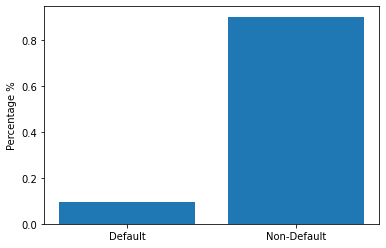

In [ ]:
num_data = len(credit_data["default"])
num_def = len(credit_data[credit_data["default"]== 1])
percent_def = len(credit_data[credit_data["default"]== 1])/len(credit_data["default"])
percent_non_def = 1- percent_def
label = ["Default", "Non-Default"]
percent = [percent_def, percent_non_def]
plt.bar(label, percent)
plt.ylabel('Percentage %')
plt.show()

### *Pairplot of significant data features*
Dive deeper into the relationships between different features and the target variable

In [ ]:
credit_data["Default_status"] = credit_data["default"]
credit_data["Default_status"].replace(1,"Default", inplace = True)
credit_data["Default_status"].replace(0,"Non-default", inplace = True)

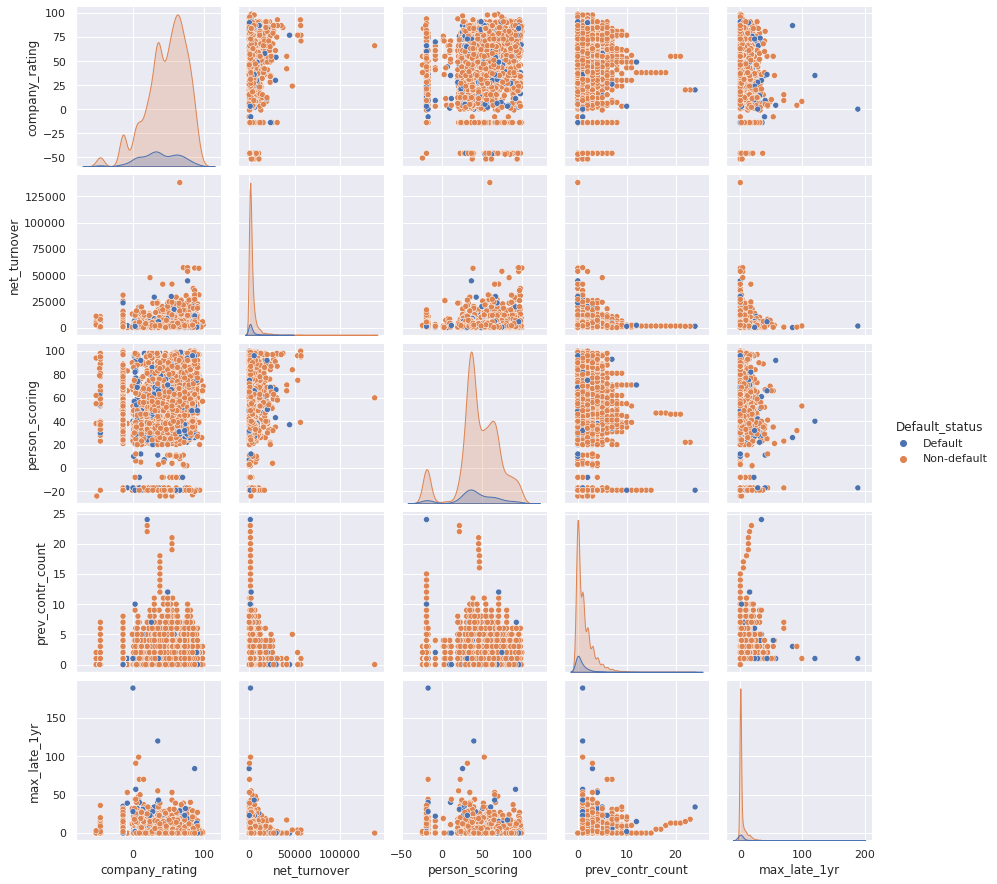

In [ ]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
#plt.figure(figsize= (40,15))
sns.pairplot(credit_data[["company_rating",	"net_turnover",	"person_scoring",	"prev_contr_count",	"max_late_1yr", "Default_status"]], hue = "Default_status", hue_order = ['Default', 'Non-default'])
# sns.pairplot(credit_data, hue = "Defualt_status")
plt.show()

### *Correlation matrix*
To have more precise and mathematical measures of the relationship between different features and the target variable, we can use a correlation matrix to measure the linear relationships that exist

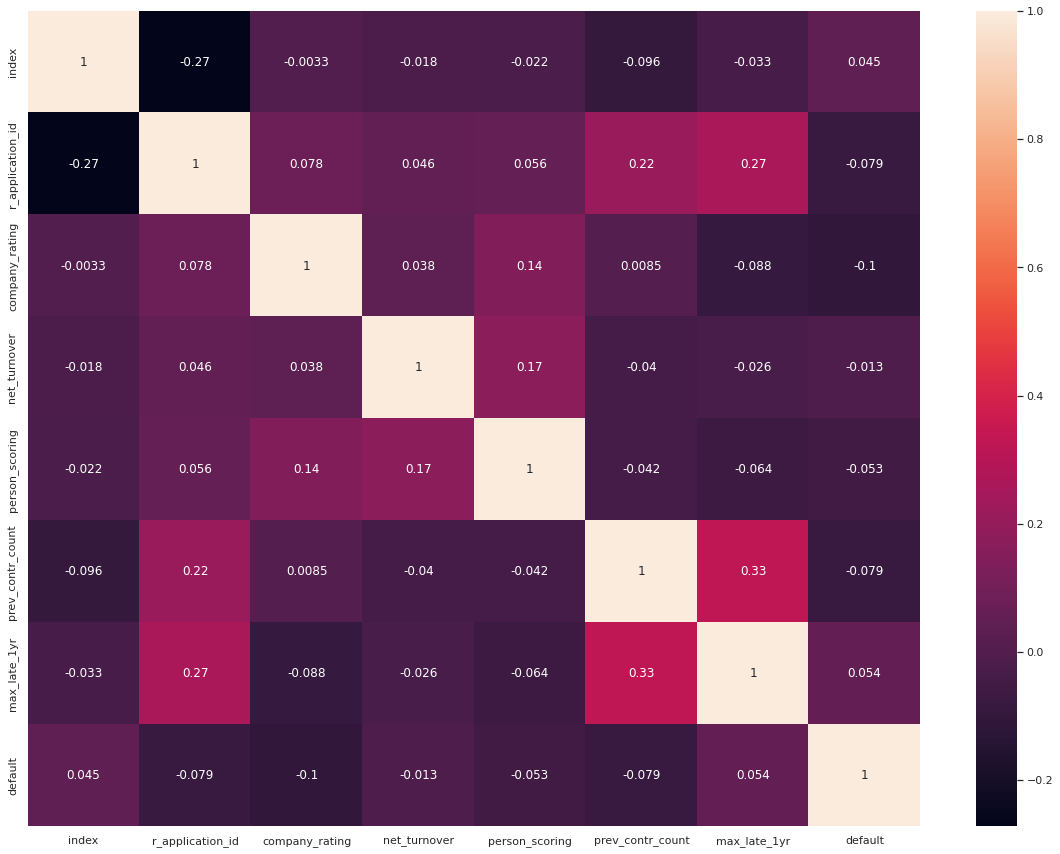

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(credit_data.corr(), annot=True)
plt.show()

# **3. Data cleaning**

## *Deal with the date data*
Columns containing dates **applic_date** and **incorporation_date** do not seem to be that useful for further analysis on their own.

However the difference between those dates - number of days from the incorporation date until the company applied for the loan should have more value

In [ ]:
# Convert string date columns to datetime
credit_data['applic_date'] = pd.to_datetime(credit_data['applic_date'], format='%Y-%m-%d %H:%M:%S.%f')
credit_data['incorporation_date'] = pd.to_datetime(credit_data['incorporation_date'], format='%Y-%m-%d')

# Create a column with number of days from incorporation date to application date
credit_data['incorp_to_applic_days'] = abs(credit_data['applic_date'] - credit_data['incorporation_date']).dt.days

In [ ]:
# Drop columns
# These columns do not contain any useful data for further analysis
credit_data = credit_data.drop(['company_type', 'index', 'r_application_id', 'applic_date', 'incorporation_date'], axis = 1)

## *Fix data type of the **`uc_risk_class`** column*

In [ ]:
# Clean up uc_risk_class column
credit_data["uc_risk_class"].replace('nr', None, inplace = True)
credit_data['uc_risk_class'] = credit_data['uc_risk_class'].astype(float)

## *Fix missing data in the **`net_turnover`** column*
**`net_turnover`** column is missing ~21% of data. We can try to replace missing data with 0 instead of dropping those rows. This might potentially improve the accuracy of further analysis since we will retain a lot of other valuable data

In [ ]:
# Fill Null values in net_turnover with 0
credit_data['net_turnover'] = credit_data['net_turnover'].fillna(0)

In [ ]:
print(credit_data.info())
credit_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_rating         4912 non-null   float64
 1   net_turnover           4929 non-null   float64
 2   person_scoring         4885 non-null   float64
 3   prev_contr_count       4929 non-null   int64  
 4   max_late_1yr           4929 non-null   float64
 5   uc_risk_class          1719 non-null   float64
 6   default                4929 non-null   int64  
 7   Default_status         4929 non-null   object 
 8   incorp_to_applic_days  4914 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 346.7+ KB
None


,company_rating,net_turnover,person_scoring,prev_contr_count,max_late_1yr,uc_risk_class,default,incorp_to_applic_days
count,4912.000000,4929.000000,4885.000000,4929.000000,4929.000000,1719.000000,4929.000000,4914.000000
mean,46.039902,2530.419761,45.613511,1.236153,2.938730,2.419430,0.096977,2471.127188
std,28.032845,4902.808881,26.033299,1.897277,7.575479,1.018053,0.295957,2965.455969
min,-52.000000,0.000000,-24.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,29.000000,123.000000,35.000000,0.000000,0.000000,2.000000,0.000000,763.000000
50%,50.000000,1118.000000,43.000000,1.000000,0.000000,2.000000,0.000000,1495.500000
75%,66.000000,2799.000000,63.000000,2.000000,2.000000,3.000000,0.000000,2778.750000
max,99.000000,138303.000000,100.000000,24.000000,189.000000,5.000000,1.000000,28245.000000


## *Fix **Creditsafe** data*
**`company_rating`** as well as **`person_scoring`** both contain negative values, which are not actual scores, but rather some "error codes"

In [ ]:
# Replace negative values with NaN
credit_data['company_rating'] = credit_data['company_rating'].where(credit_data['company_rating'] >= 0, np.nan) #replace negative values to nan
credit_data['person_scoring'] = credit_data['person_scoring'].where(credit_data['person_scoring'] >= 0, np.nan) #replace negative values to nan
credit_data.describe()

,company_rating,net_turnover,person_scoring,prev_contr_count,max_late_1yr,uc_risk_class,default,incorp_to_applic_days
count,4637.000000,4929.000000,4510.000000,4929.000000,4929.000000,1719.000000,4929.000000,4914.000000
mean,50.042269,2530.419761,50.942572,1.236153,2.938730,2.419430,0.096977,2471.127188
std,23.119591,4902.808881,19.070820,1.897277,7.575479,1.018053,0.295957,2965.455969
min,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,35.000000,123.000000,36.000000,0.000000,0.000000,2.000000,0.000000,763.000000
50%,53.000000,1118.000000,47.000000,1.000000,0.000000,2.000000,0.000000,1495.500000
75%,68.000000,2799.000000,65.000000,2.000000,2.000000,3.000000,0.000000,2778.750000
max,99.000000,138303.000000,100.000000,24.000000,189.000000,5.000000,1.000000,28245.000000


## *Remove missing data*

In [ ]:
# Checking for missing values:
nulval = credit_data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
company_rating,292,7.42
net_turnover,0,0.00
person_scoring,419,10.65
prev_contr_count,0,0.00
max_late_1yr,0,0.00
uc_risk_class,3210,81.55
default,0,0.00
Default_status,0,0.00
incorp_to_applic_days,15,0.38


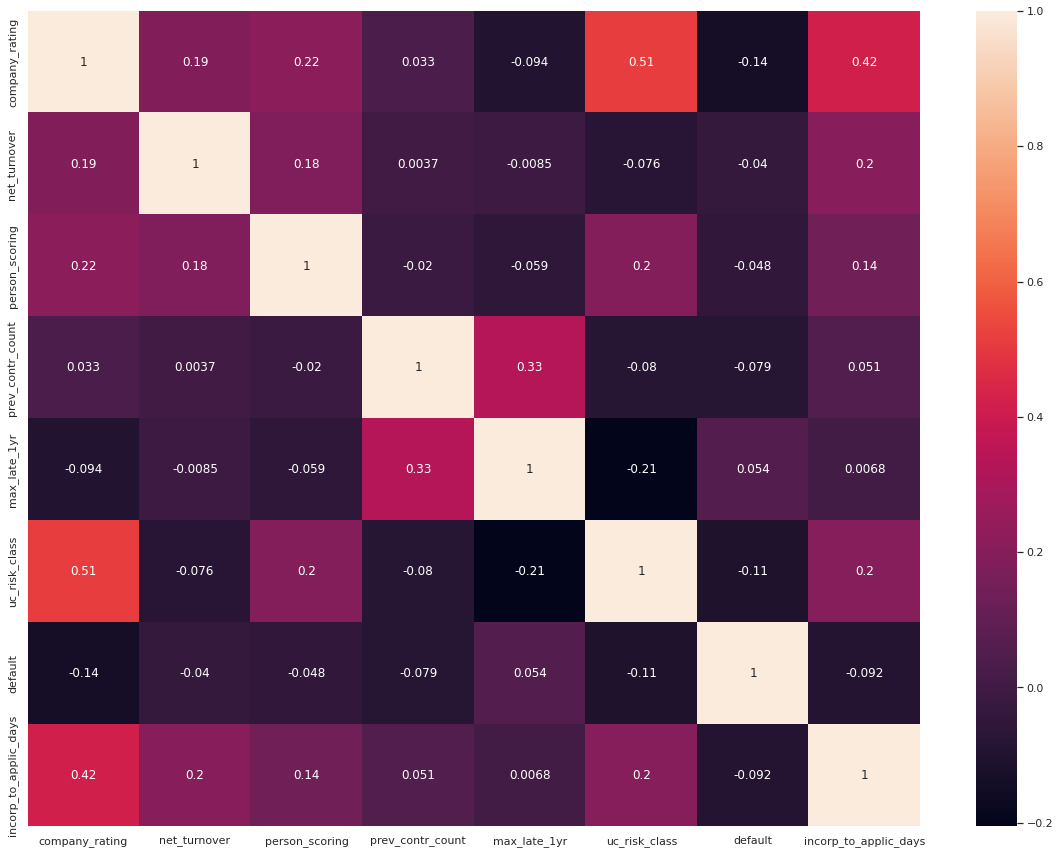

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(credit_data.corr(), annot=True)
plt.show()

### *Drop **`uc_risk_class`** column*

**`uc_risk_class`** is missing a lot of data (~82%). At the same time it has 51% correlation with the **`company_rating`** column. Should be safe to drop **`uc_risk_class`** at this stage to get better accuracy with the rest of the data

In [ ]:
# Drop uc_risk_class column and also clean up NaN by dropping rows containing missing data
credit_data_clean = credit_data.drop(['uc_risk_class'], axis = 1)

### *Drop rows containing missing data*

In [ ]:
credit_data_clean = credit_data_clean.dropna()
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4234 entries, 0 to 4928
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_rating         4234 non-null   float64
 1   net_turnover           4234 non-null   float64
 2   person_scoring         4234 non-null   float64
 3   prev_contr_count       4234 non-null   int64  
 4   max_late_1yr           4234 non-null   float64
 5   default                4234 non-null   int64  
 6   Default_status         4234 non-null   object 
 7   incorp_to_applic_days  4234 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 297.7+ KB


### *Re-visualise correlation between remaining data*

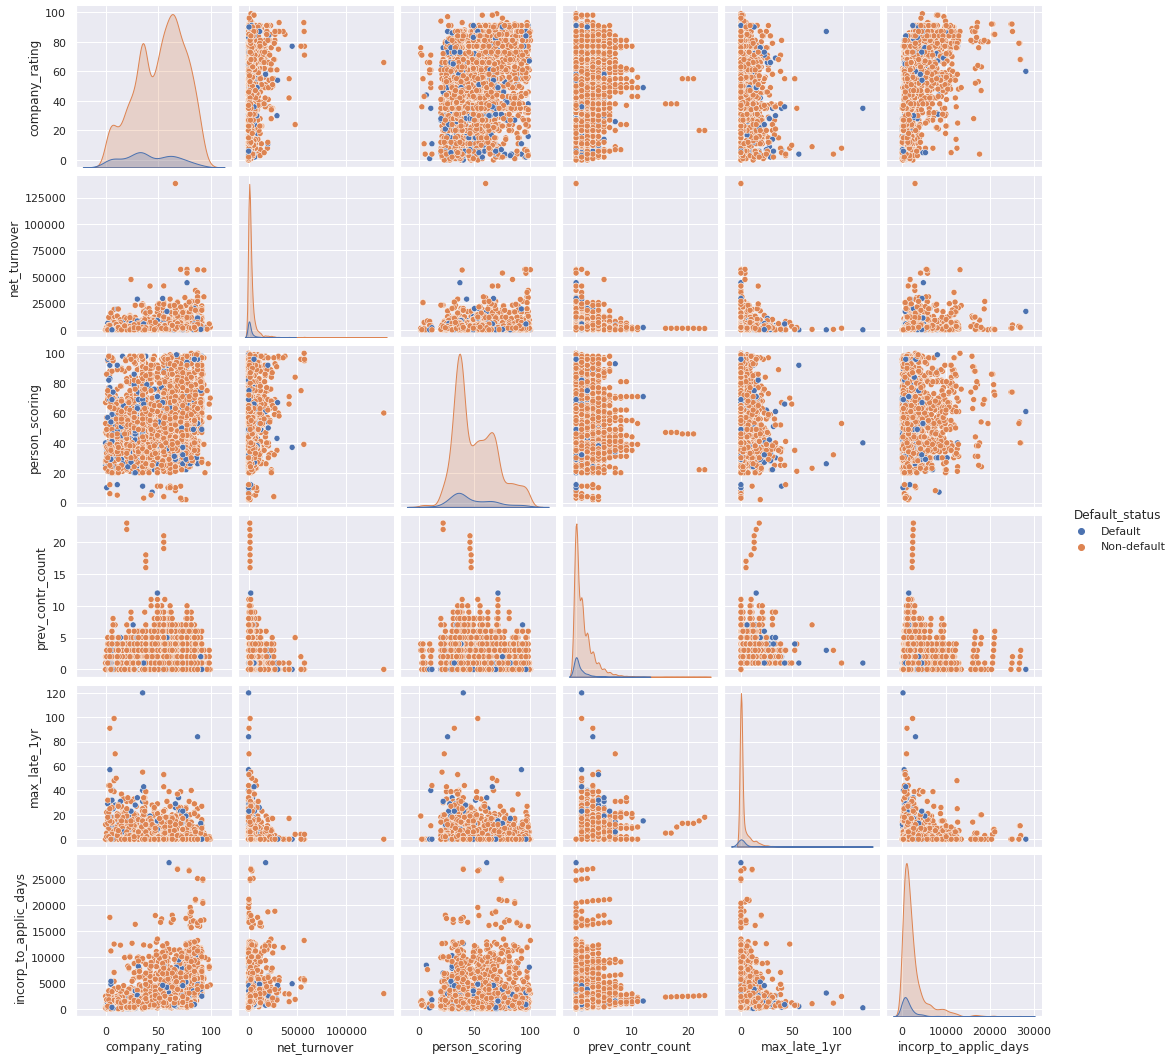

In [ ]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
#plt.figure(figsize= (40,15))
sns.pairplot(credit_data_clean[["company_rating",	"net_turnover",	"person_scoring",	"prev_contr_count",	"max_late_1yr", "incorp_to_applic_days", "Default_status"]], hue = "Default_status", hue_order = ['Default', 'Non-default'])
# sns.pairplot(credit_data, hue = "Defualt_status")
plt.show()

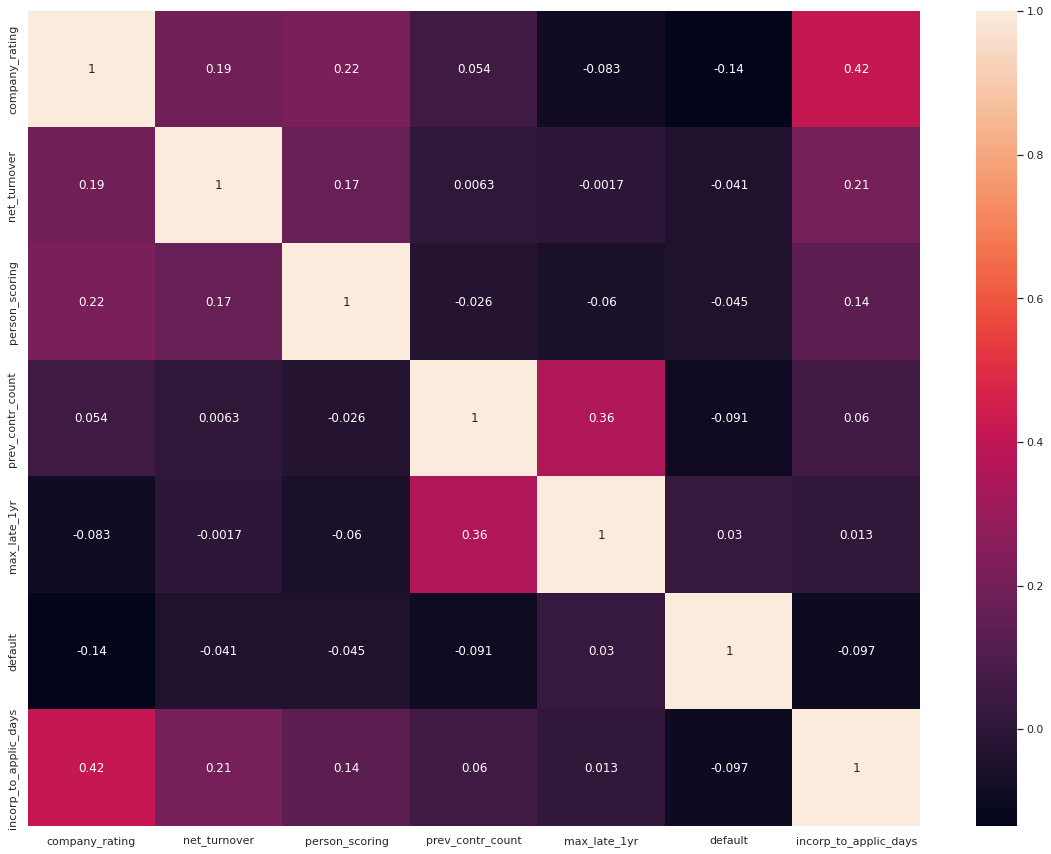

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(credit_data_clean.corr(), annot=True)
plt.show()

# **4. Data Preprocessing**

## *Data normalization*

In [ ]:
values = credit_data_clean.drop('Default_status', axis = 1)
# print(values)
# Now impute it
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(values)
credit_data_clean_norm = pd.DataFrame(normalizedData, columns=values.columns)
credit_data_clean_norm.head(10)

,company_rating,net_turnover,person_scoring,prev_contr_count,max_late_1yr,default,incorp_to_applic_days
0,0.202020,0.015531,0.326531,0.173913,0.108333,0.0,0.065642
1,0.888889,0.020506,0.397959,0.000000,0.000000,0.0,0.118432
2,0.626263,0.004447,0.469388,0.217391,0.066667,0.0,0.077680
3,0.424242,0.000065,0.306122,0.000000,0.000000,1.0,0.040717
4,0.020202,0.021655,0.306122,0.043478,0.183333,0.0,0.079026
5,0.555556,0.018322,0.540816,0.000000,0.000000,0.0,0.028714
6,0.616162,0.012169,0.214286,0.000000,0.000000,0.0,0.016889
7,0.989899,0.040057,0.653061,0.130435,0.016667,0.0,0.294682
8,0.000000,0.000000,0.459184,0.000000,0.000000,0.0,0.019863
9,0.222222,0.020896,0.673469,0.130435,0.083333,0.0,0.076866


# **5. Data Modelling**

As we could find from the initial data analysis, about 90% of data is non-default, while only about 10 is default. This would potentially mislead the predictive models. To avoid this problem we need to make sure that default and non-default creditors take roughly the same weights, which could ensure the potency of our predictive models. This can be achieved in two ways:

1.   **Undersampling of the dataset**. Employ NearMiss algorithm to bring down the amount of the non-default data
2.   **Oversampling of the dataset**. Employ Synthetic Minority Oversampling Technique (SMOTE) to generate synthetic data for defaulted data.



## *Modelling using the undersampled data*

In [ ]:
# Split data into Train and Test subsets
X = credit_data_clean_norm.loc[:, credit_data_clean_norm.columns != "default"]
y = credit_data_clean_norm.loc[:, "default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)
# Since a large imbalance in the distribution of the target variable ("y") we split the data in stratified fashion ("stratify = y") to make sure to approximately preserve relative class frequencies in test and train subsets

In [ ]:
ns = NearMiss(sampling_strategy='not minority')

X_train, y_train = ns.fit_resample(X_train, y_train)
print(pd.DataFrame(y_train).value_counts())
X_test, y_test = ns.fit_resample(X_test, y_test)
print(pd.DataFrame(y_test).value_counts())

default
0.0        322
1.0        322
dtype: int64
default
0.0        81
1.0        81
dtype: int64


### KNN

In [ ]:
# GridSearch for KNN
params_knn = {'n_neighbors':[3, 5, 7, 10, 12, 15]}
model_knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator = model_knn, param_grid = params_knn, scoring="f1", n_jobs = -1)
grid_knn.fit(X_train, y_train)
df_knn = pd.DataFrame(grid_knn.cv_results_)
df_knn.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/knn_param_tuning.csv")
df_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003589,0.000288,0.008659,0.000507,3,{'n_neighbors': 3},0.563758,0.672269,0.553571,0.557692,0.573770,0.584212,0.044550,6
1,0.003131,0.000052,0.008941,0.000066,5,{'n_neighbors': 5},0.571429,0.691589,0.600000,0.598131,0.650000,0.622230,0.042983,3
2,0.003189,0.000214,0.009111,0.000306,7,{'n_neighbors': 7},0.617647,0.757282,0.604167,0.568627,0.603448,0.630234,0.065562,2
3,0.003167,0.000252,0.010451,0.001750,10,{'n_neighbors': 10},0.672897,0.745098,0.595745,0.479167,0.561404,0.610862,0.091527,4
4,0.003100,0.000244,0.010671,0.000866,12,{'n_neighbors': 12},0.660377,0.720000,0.549451,0.479167,0.589286,0.599656,0.084042,5
5,0.003277,0.000160,0.009394,0.000885,15,{'n_neighbors': 15},0.720000,0.745098,0.632653,0.505051,0.611111,0.642783,0.085448,1


In [ ]:
best_hyperparams = grid_knn.best_params_
print("Best hyperparameters: \n", best_hyperparams )
knn_aftertune_cv_scores = grid_knn.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:\n",  knn_aftertune_cv_scores)
best_knn_model = grid_knn.best_estimator_

Best hyperparameters: 
 {'n_neighbors': 15}
The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:
 0.6427825433203584


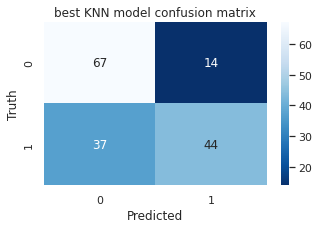

In [ ]:
matrix_knn = confusion_matrix(y_test, best_knn_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_knn, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best KNN model confusion matrix")
plt.show()

### LogisticRegression
Logistic Regression aims to classify an observation based on its modelled posterior probability of the observation belonging to a specific class.

In [ ]:
# GridSearch for LogisticRegression
params_lr = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False], 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}  # GridSearch params
model_lr = LogisticRegression(random_state=42)

grid_lr = GridSearchCV(estimator = model_lr, param_grid = params_lr, scoring="f1", n_jobs = -1)
grid_lr.fit(X_train, y_train)
df_lr = pd.DataFrame(grid_lr.cv_results_)
df_lr.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/logistic_param_tuning.csv")
df_lr

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
840 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_dual,param_fit_intercept,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000683,0.000191,0.000000,0.000000,0.001,True,True,l1,newton-cg,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,173
1,0.000609,0.000112,0.000000,0.000000,0.001,True,True,l1,lbfgs,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,202
2,0.004179,0.002678,0.000000,0.000000,0.001,True,True,l1,liblinear,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,203
3,0.000633,0.000023,0.000000,0.000000,0.001,True,True,l1,sag,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,204
4,0.000636,0.000026,0.000000,0.000000,0.001,True,True,l1,saga,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.018218,0.001084,0.003024,0.000262,1000,False,False,l2,newton-cg,"{'C': 1000, 'dual': False, 'fit_intercept': Fa...",0.905983,0.763636,0.725664,0.605505,0.592000,0.718558,0.114899,3
276,0.017328,0.003209,0.003025,0.000086,1000,False,False,l2,lbfgs,"{'C': 1000, 'dual': False, 'fit_intercept': Fa...",0.905983,0.763636,0.725664,0.605505,0.592000,0.718558,0.114899,3
277,0.003905,0.000213,0.002936,0.000180,1000,False,False,l2,liblinear,"{'C': 1000, 'dual': False, 'fit_intercept': Fa...",0.905983,0.763636,0.725664,0.605505,0.592000,0.718558,0.114899,3
278,0.014253,0.003373,0.002965,0.000659,1000,False,False,l2,sag,"{'C': 1000, 'dual': False, 'fit_intercept': Fa...",0.905983,0.756757,0.725664,0.623853,0.603175,0.723086,0.108460,1


In [ ]:
best_hyperparams = grid_lr.best_params_
print("Best hyperparameters: \n", best_hyperparams )
lr_aftertune_cv_scores = grid_lr.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:\n",  lr_aftertune_cv_scores)
best_lr_model = grid_lr.best_estimator_

Best hyperparameters: 
 {'C': 1000, 'dual': False, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'sag'}
The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:
 0.72308623874752


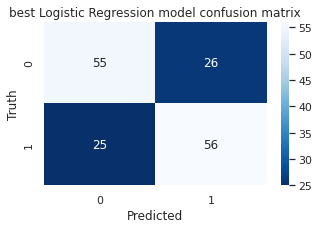

In [ ]:
matrix_lr = confusion_matrix(y_test, best_lr_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_lr, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best Logistic Regression model confusion matrix")
plt.show()

### Support Vector Machines
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points and has the maximum margin.

In [ ]:
# GridSearch for SVM
params_svm = {'C': [0.1, 1, 10, 50, 100, 200, 500, 1000], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}  # GridSearch params
model_svm = SVC(random_state=42)

grid_svm = GridSearchCV(estimator = model_svm, param_grid = params_svm, refit = True, verbose = 4, scoring="f1", n_jobs = -1)
grid_svm.fit(X_train, y_train)
df_svm = pd.DataFrame(grid_svm.cv_results_)
df_svm.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/svm_param_tuning.csv")
df_svm

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024727,0.006493,0.008377,0.000347,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.780952,0.680412,0.625000,0.470588,0.578512,0.627093,0.103319,13
1,0.021781,0.000235,0.008957,0.000185,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.663212,0.663212,0.000000,0.000000,0.365854,0.338456,0.296914,16
2,0.018508,0.002138,0.006957,0.000324,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.825688,0.780952,0.718447,0.551724,0.614173,0.698197,0.102007,11
3,0.021596,0.000555,0.008698,0.000756,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.504854,0.494118,0.354430,0.400000,0.404762,0.431633,0.058221,15
4,0.017674,0.002161,0.006657,0.000850,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.846847,0.780952,0.645833,0.584906,0.650407,0.701789,0.096687,10
5,0.018603,0.000557,0.008930,0.002679,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.720000,0.720000,0.555556,0.511111,0.500000,0.601333,0.098659,14
6,0.020122,0.001089,0.006064,0.000312,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.836364,0.769231,0.693069,0.592593,0.655462,0.709344,0.085463,8
7,0.016982,0.000951,0.007052,0.000499,50,auto,rbf,"{'C': 50, 'gamma': 'auto', 'kernel': 'rbf'}",0.803738,0.769231,0.653061,0.596154,0.660714,0.696580,0.077494,12
8,0.022950,0.002122,0.006050,0.000234,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.836364,0.769231,0.699029,0.612613,0.672131,0.717873,0.077724,7
9,0.017081,0.001302,0.007048,0.001189,100,auto,rbf,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.825688,0.792453,0.666667,0.584906,0.655462,0.705035,0.090066,9


In [ ]:
best_hyperparams = grid_svm.best_params_
print("Best hyperparameters: \n", best_hyperparams )
svm_aftertune_cv_scores = grid_svm.best_score_
print("The cross-validation accuracy score for tuned SVM model after a 10 fold cross validation:\n",  svm_aftertune_cv_scores)
best_svm_model = grid_svm.best_estimator_

Best hyperparameters: 
 {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
The cross-validation accuracy score for tuned SVM model after a 10 fold cross validation:
 0.7333636856335958


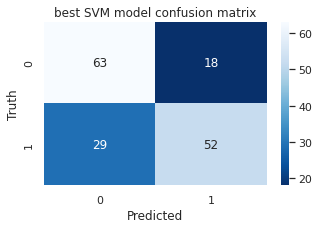

In [ ]:
matrix_svm = confusion_matrix(y_test, best_svm_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_svm, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best SVM model confusion matrix")
plt.show()

### Decision Trees
A decision tree algorithm binary splits the feature space into subsets in order to divide the samples into more homogeneous groups.

In [ ]:
# GridSearch for DecisionTreeClassifier

params_dt = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 10, 7, 5], 'min_samples_split':[2, 3, 4]}  # Grid search params
model_dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(estimator = model_dt, param_grid = params_dt, scoring = "f1", n_jobs = -1)
grid_dt.fit(X_train, y_train)
df_dt = pd.DataFrame(grid_dt.cv_results_)
df_dt.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/decisiontree_param_tuning.csv")
df_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006194,0.003496,0.004561,0.001891,gini,None,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.765957,0.681159,0.691176,0.560000,0.634483,0.666555,0.067945,28
1,0.004716,0.001741,0.003600,0.001276,gini,None,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.697987,0.702290,0.635659,0.528926,0.630137,0.639000,0.062755,43
2,0.005838,0.001809,0.003136,0.000120,gini,None,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.762590,0.718750,0.707692,0.585366,0.648276,0.684535,0.061561,24
3,0.004336,0.001759,0.002871,0.000062,gini,None,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.649351,0.661538,0.605042,0.528000,0.613139,0.611414,0.046804,48
4,0.005569,0.002506,0.002903,0.000119,gini,None,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.751773,0.727273,0.707692,0.561983,0.647482,0.679241,0.068023,25
5,0.004665,0.002851,0.004718,0.002606,gini,None,4,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.746479,0.666667,0.614173,0.552846,0.637681,0.643569,0.063645,42
6,0.003925,0.000050,0.002851,0.000136,gini,10,2,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.830508,0.745098,0.697248,0.558559,0.646154,0.695513,0.091519,17
7,0.003067,0.000081,0.002875,0.000092,gini,10,2,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.886957,0.747664,0.646465,0.553571,0.596774,0.686286,0.119371,22
8,0.005837,0.002347,0.004063,0.002178,gini,10,3,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.820513,0.745098,0.685185,0.545455,0.646154,0.688481,0.092625,19
9,0.002954,0.000054,0.004132,0.002512,gini,10,3,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.836066,0.781818,0.646465,0.450980,0.596774,0.662421,0.136879,32


In [ ]:
best_hyperparams = grid_dt.best_params_
print("Best hyperparameters: \n", best_hyperparams )
dt_aftertune_cv_scores = grid_dt.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:\n",  dt_aftertune_cv_scores)
best_dt_model = grid_dt.best_estimator_

Best hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}
The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:
 0.7254219747999893


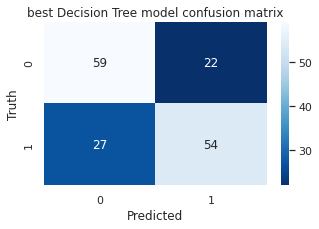

In [ ]:
matrix_dt = confusion_matrix(y_test, best_dt_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_dt, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best Decision Tree model confusion matrix")
plt.show()

             features  importance
     prev_contr_count    0.350763
incorp_to_applic_days    0.277090
       person_scoring    0.123705
       company_rating    0.120115
         net_turnover    0.106838
         max_late_1yr    0.021489


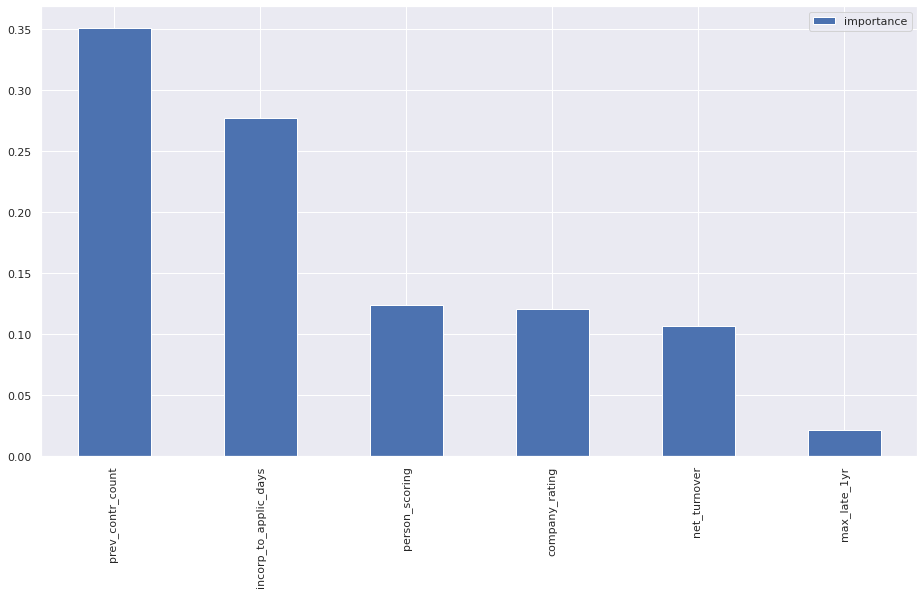

In [ ]:
# Top 3 features for Decision Tree
# Enter your code here

important_features_dt = best_dt_model.feature_importances_
features_name_dt = X.columns
imp_feature_frame_dt = pd.DataFrame({'features': features_name_dt, 'importance': important_features_dt}, index=X.columns).sort_values(by = "importance", ascending = False)
print(imp_feature_frame_dt.to_string(index=False))
imp_feature_frame_dt.plot(kind='bar')
# print(list(imp_feature_frame_dt.features))

### AdaBoost
AdaBoost is an ensemble learning method (also known as “meta-learning”) which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.

In [ ]:
# GridSearch for AdaBoost
base_dt = best_dt_model
params_ada = {'algorithm':['SAMME', 'SAMME.R'],
              'n_estimators':[100,300,500,600],
              'learning_rate':[0.01,0.08, 0.1, 0.5, 1.0]
              }  ## GridSearch params
model_ada = AdaBoostClassifier(base_estimator = base_dt, n_estimators = 200, learning_rate = .05, random_state = 42)

grid_ada = GridSearchCV(estimator = model_ada, param_grid = params_ada, scoring = "f1", n_jobs = -1)
grid_ada.fit(X_train, y_train)
df_ada = pd.DataFrame(grid_ada.cv_results_)
df_ada.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/adaboost_param_tuning.csv")
df_ada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.321796,0.005764,0.020624,0.005909,SAMME,0.01,100,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.803738,0.745098,0.666667,0.571429,0.650794,0.687545,0.080103,19
1,0.962421,0.019078,0.046685,0.005885,SAMME,0.01,300,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.836364,0.757282,0.666667,0.611111,0.661290,0.706543,0.080216,12
2,1.592498,0.042749,0.071169,0.006855,SAMME,0.01,500,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.846847,0.757282,0.679612,0.623853,0.677419,0.717003,0.077619,11
3,1.873171,0.019212,0.092244,0.006842,SAMME,0.01,600,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.846847,0.757282,0.679612,0.623853,0.682927,0.718104,0.077087,10
4,0.327513,0.016514,0.017263,0.001045,SAMME,0.08,100,"{'algorithm': 'SAMME', 'learning_rate': 0.08, ...",0.857143,0.769231,0.692308,0.607143,0.682927,0.721750,0.084964,8
5,0.933983,0.007851,0.046029,0.007673,SAMME,0.08,300,"{'algorithm': 'SAMME', 'learning_rate': 0.08, ...",0.877193,0.769231,0.692308,0.642857,0.688000,0.733918,0.082349,4
6,1.550280,0.010429,0.070540,0.004777,SAMME,0.08,500,"{'algorithm': 'SAMME', 'learning_rate': 0.08, ...",0.867257,0.769231,0.716981,0.630631,0.692913,0.735403,0.079563,2
7,1.899572,0.024047,0.082531,0.006781,SAMME,0.08,600,"{'algorithm': 'SAMME', 'learning_rate': 0.08, ...",0.867257,0.769231,0.716981,0.625000,0.692913,0.734276,0.081064,3
8,0.312327,0.009524,0.015967,0.000406,SAMME,0.1,100,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.857143,0.769231,0.692308,0.607143,0.677419,0.720649,0.085494,9
9,0.939181,0.012860,0.043388,0.001169,SAMME,0.1,300,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.877193,0.780952,0.692308,0.625000,0.682171,0.731525,0.088299,5


In [ ]:
best_hyperparams = grid_ada.best_params_
print("Best hyperparameters: \n", best_hyperparams )
ada_aftertune_cv_scores = grid_ada.best_score_
print("The cross-validation accuracy score for tuned AdaBoost model after a 5 fold cross validation:\n",  ada_aftertune_cv_scores)
best_ada_model = grid_ada.best_estimator_

Best hyperparameters: 
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100}
The cross-validation accuracy score for tuned AdaBoost model after a 5 fold cross validation:
 0.7414843788658351


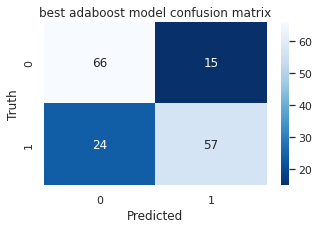

In [ ]:
matrix = confusion_matrix(y_test, best_ada_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best adaboost model confusion matrix")
plt.show()

             features  importance
incorp_to_applic_days    0.374542
       person_scoring    0.177787
         max_late_1yr    0.134355
         net_turnover    0.125886
       company_rating    0.095475
     prev_contr_count    0.091956


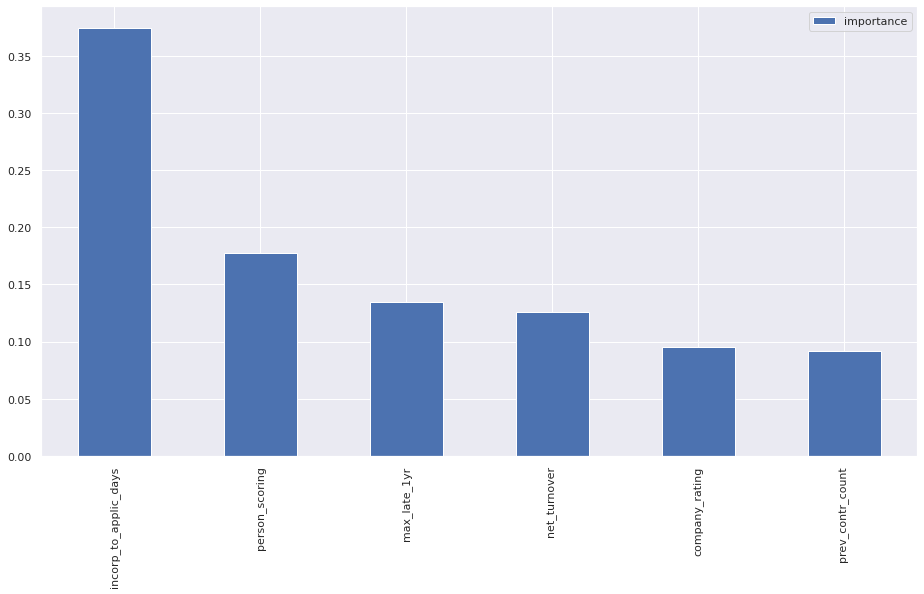

In [ ]:
# Top 3 features for AdaBoost
# Enter your code here

important_features_ada = best_ada_model.feature_importances_
features_name_ada = X.columns
imp_feature_frame_ada = pd.DataFrame({'features': features_name_ada, 'importance': important_features_ada}, index=X.columns).sort_values(by = "importance", ascending = False)
print(imp_feature_frame_ada.to_string(index=False))
imp_feature_frame_ada.plot(kind='bar')
# print(list(imp_feature_frame_ada.features))

### XGBoost
XGBoost is an abbreviation of eXtreme Gradient Boosting. One of the advantages of XGBoost is its scalability and faster model exploration due to the parallel and distributed computing 

In [ ]:
# GridSearch for XGBoost
params_xgb = {'gamma': [0,0.1,10,50,200],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [5,8,12],
              'n_estimators': [50,100,150],
              'reg_alpha': [0,0.1,10,50,200],
              'reg_lambda': [0,0.1,10,50,200]}  ## GridSearch params
model_xgb = XGBClassifier(random_state = 42)

grid_xgb = GridSearchCV(estimator = model_xgb, param_grid = params_xgb, scoring = "f1", n_jobs = -1)
grid_xgb.fit(X_train, y_train)
df_xgb = pd.DataFrame(grid_xgb.cv_results_)
df_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/xgboost_param_tuning.csv")
df_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.240709,0.234898,0.003645,0.001178,0,0.01,5,50,0,0,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.825688,0.769231,0.685714,0.594595,0.687023,0.712450,0.079118,619
1,0.045358,0.003842,0.003104,0.001053,0,0.01,5,50,0,0.1,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.825688,0.769231,0.711538,0.600000,0.687023,0.718696,0.076347,542
2,0.044812,0.004968,0.002533,0.000282,0,0.01,5,50,0,10,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.825688,0.780952,0.732143,0.631579,0.641791,0.722431,0.076076,465
3,0.044889,0.002555,0.002529,0.000204,0,0.01,5,50,0,50,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.846847,0.792453,0.720000,0.606061,0.617450,0.716562,0.094635,572
4,0.043212,0.002194,0.002849,0.000601,0,0.01,5,50,0,200,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.846847,0.810811,0.769231,0.592593,0.616352,0.727167,0.103421,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,0.045780,0.007991,0.002342,0.000082,200,0.5,12,150,200,0,"{'gamma': 200, 'learning_rate': 0.5, 'max_dept...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2080
3371,0.050736,0.001383,0.002384,0.000103,200,0.5,12,150,200,0.1,"{'gamma': 200, 'learning_rate': 0.5, 'max_dept...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2080
3372,0.055770,0.004961,0.002367,0.000039,200,0.5,12,150,200,10,"{'gamma': 200, 'learning_rate': 0.5, 'max_dept...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2080
3373,0.052808,0.002844,0.002346,0.000090,200,0.5,12,150,200,50,"{'gamma': 200, 'learning_rate': 0.5, 'max_dept...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2080


In [ ]:
best_hyperparams = grid_xgb.best_params_
print("Best hyperparameters: \n", best_hyperparams )
xgb_aftertune_cv_scores = grid_xgb.best_score_
print("The cross-validation accuracy score for tuned XGBoost model after a 5 fold cross validation:\n",  xgb_aftertune_cv_scores)
best_xgb_model = grid_xgb.best_estimator_

Best hyperparameters: 
 {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 12, 'n_estimators': 50, 'reg_alpha': 10, 'reg_lambda': 0.1}
The cross-validation accuracy score for tuned XGBoost model after a 5 fold cross validation:
 0.7787617913696927


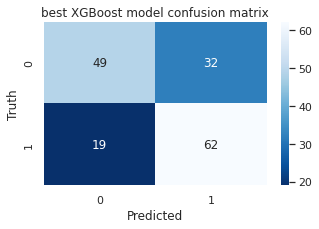

In [ ]:
matrix = confusion_matrix(y_test, best_xgb_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best XGBoost model confusion matrix")
plt.show()

             features  importance
     prev_contr_count    0.611082
incorp_to_applic_days    0.130607
         net_turnover    0.123961
       company_rating    0.059952
       person_scoring    0.058098
         max_late_1yr    0.016300


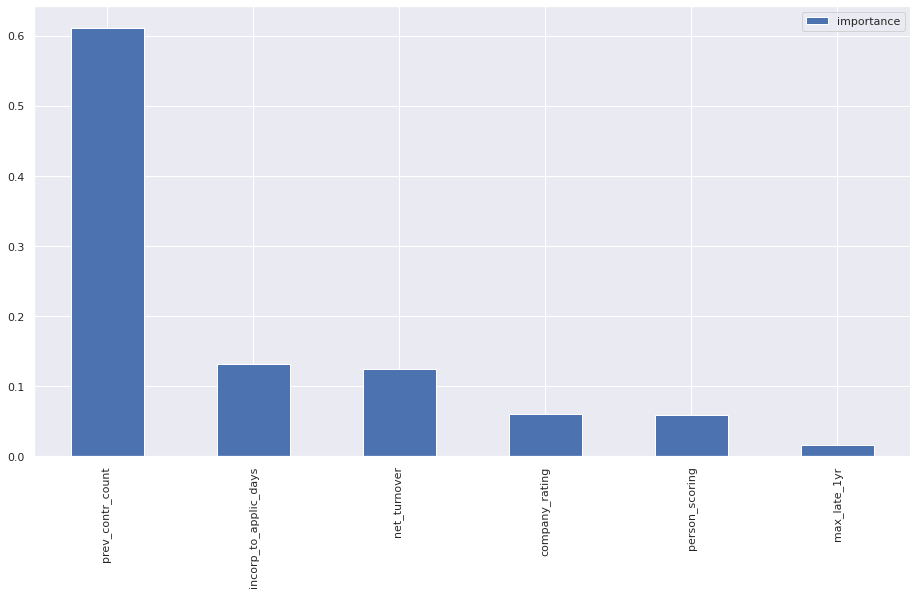

In [ ]:
# Top 3 features for XGBoost
# Enter your code here

important_features_xgb = best_xgb_model.feature_importances_
features_name_xgb = X.columns
imp_feature_frame_xgb = pd.DataFrame({'features': features_name_xgb, 'importance': important_features_xgb}, index=X.columns).sort_values(by = "importance", ascending = False)
print(imp_feature_frame_xgb.to_string(index=False))
imp_feature_frame_xgb.plot(kind='bar')
# print(list(imp_feature_frame_xgb.features))

### Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
# GridSearch for Random Forest
params_rf = {'n_estimators': [100,300,400,500, 600,1000],
             'max_depth':[None, 5, 7, 10, 100, 200],
             'criterion': ["gini", "entropy"],
             'max_features': ["log2", "sqrt"],
             'bootstrap':[True, False],
             'min_samples_split':[2, 3, 4]
             }  # GridSearch params
model_rf = RandomForestClassifier(random_state = 42)

grid_rf = GridSearchCV(estimator = model_rf, param_grid = params_rf, scoring="f1", n_jobs = -1)
grid_rf.fit(X_train, y_train)
df_rf = pd.DataFrame(grid_rf.cv_results_)
df_rf.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/rf_param_tuning.csv")
df_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.233662,0.006058,0.021497,0.001786,True,gini,None,log2,2,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.750000,0.760331,0.700855,0.610169,0.685315,0.701334,0.053697,523
1,0.700758,0.030738,0.055011,0.001563,True,gini,None,log2,2,300,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.774648,0.750000,0.689655,0.605042,0.693878,0.702645,0.058650,469
2,0.897942,0.014623,0.074714,0.005941,True,gini,None,log2,2,400,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.760563,0.739496,0.678261,0.600000,0.689189,0.693502,0.055868,697
3,1.141374,0.023491,0.093896,0.011019,True,gini,None,log2,2,500,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.741259,0.750000,0.678261,0.600000,0.689189,0.691742,0.053760,739
4,1.336789,0.019472,0.107518,0.005264,True,gini,None,log2,2,600,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.741259,0.739496,0.666667,0.605042,0.689189,0.688330,0.050648,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0.762094,0.046247,0.054126,0.002084,False,entropy,200,sqrt,4,300,"{'bootstrap': False, 'criterion': 'entropy', '...",0.738255,0.741935,0.683333,0.633333,0.671233,0.693618,0.041396,691
860,0.994742,0.047777,0.069383,0.002616,False,entropy,200,sqrt,4,400,"{'bootstrap': False, 'criterion': 'entropy', '...",0.738255,0.736000,0.677686,0.633333,0.671233,0.691301,0.040376,751
861,1.252801,0.064631,0.087993,0.005199,False,entropy,200,sqrt,4,500,"{'bootstrap': False, 'criterion': 'entropy', '...",0.738255,0.736000,0.694215,0.633333,0.684932,0.697347,0.038547,619
862,1.505956,0.072881,0.108879,0.010690,False,entropy,200,sqrt,4,600,"{'bootstrap': False, 'criterion': 'entropy', '...",0.746667,0.736000,0.694215,0.633333,0.680272,0.698097,0.040799,607


In [ ]:
best_hyperparams = grid_rf.best_params_
print("Best hyperparameters: \n", best_hyperparams )
rf_aftertune_cv_scores = grid_rf.best_score_
print("The cross-validation accuracy score for tuned Random Forest model after a 10 fold cross validation:\n",  rf_aftertune_cv_scores)
best_rf_model = grid_rf.best_estimator_

Best hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 300}
The cross-validation accuracy score for tuned Random Forest model after a 10 fold cross validation:
 0.7499988125629746


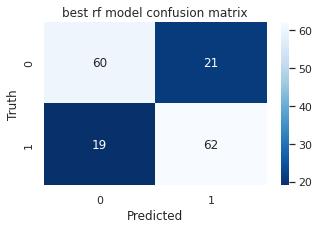

In [ ]:
matrix_rf = confusion_matrix(y_test, best_rf_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_rf, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best rf model confusion matrix")
plt.show()

             features  importance
incorp_to_applic_days    0.269545
     prev_contr_count    0.184112
       person_scoring    0.169462
       company_rating    0.160140
         net_turnover    0.142565
         max_late_1yr    0.074176


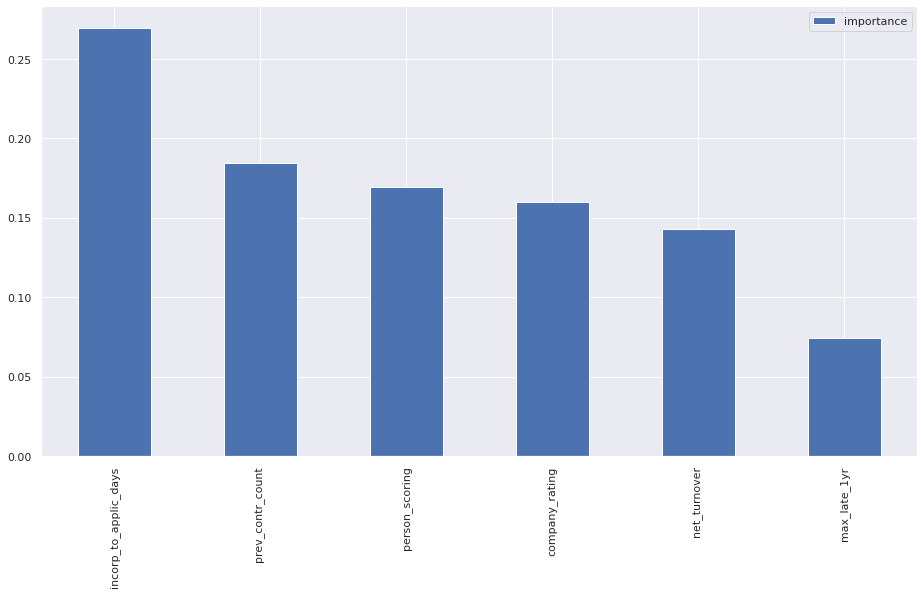

In [ ]:
# Top 3 features for RandomForest
# Enter your code here

important_features_rf = best_rf_model.feature_importances_
features_name_rf = X.columns
imp_feature_frame_rf = pd.DataFrame({'features': features_name_rf, 'importance': important_features_rf}, index=X.columns).sort_values(by = "importance", ascending =False)
print(imp_feature_frame_rf.to_string(index=False))
imp_feature_frame_rf.plot(kind='bar')
# print(list(imp_feature_frame_rf.features))

### Consolidating the best set of parameters

In [ ]:
import os

files = os.listdir("/content/drive/MyDrive/Colab Notebooks/parameter_search/")
for file in files:
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/"+file, index_col=0).sort_values(by=["rank_test_score"])
    print(file.split(".")[0], *df[df["rank_test_score"]==1]["params"], "\n")

knn_param_tuning {'n_neighbors': 15} 

logistic_param_tuning {'C': 1000, 'dual': False, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'sag'} 

svm_param_tuning {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'} 

decisiontree_param_tuning {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 3, 'splitter': 'best'} {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4, 'splitter': 'best'} {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'} 

adaboost_param_tuning {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100} 

xgboost_param_tuning {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 12, 'n_estimators': 150, 'reg_alpha': 10, 'reg_lambda': 0.1} {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 12, 'n_estimators': 50, 'reg_alpha': 10, 'reg_lambda': 0.1} {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 12, 'n_estimators': 100, 'reg_alpha': 10, 'reg_lambda': 0.1} 

rf_param_tuning {'bootstrap': True, 'criterion': 'gini', 'm

In [ ]:
models = []
mean_score = []
std_score = []

for file in files:
    print(file)
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/"+file, index_col=0)
    display(df[df["rank_test_score"]==1][["mean_test_score", "std_test_score"]])
    models.append(file.split("_param_tuning.csv")[0])
    mean_score.append(df[df["rank_test_score"]==1]["mean_test_score"].unique()[0])
    std_score.append(df[df["rank_test_score"]==1]["std_test_score"].unique()[0])

knn_param_tuning.csv


,mean_test_score,std_test_score
5,0.642783,0.085448


logistic_param_tuning.csv


,mean_test_score,std_test_score
278,0.723086,0.10846


svm_param_tuning.csv


,mean_test_score,std_test_score
15,0.733364,0.095245


decisiontree_param_tuning.csv


,mean_test_score,std_test_score
42,0.725422,0.099019
44,0.725422,0.099019
46,0.725422,0.099019


adaboost_param_tuning.csv


,mean_test_score,std_test_score
12,0.741484,0.095716


xgboost_param_tuning.csv


,mean_test_score,std_test_score
1286,0.778762,0.09421
1311,0.778762,0.09421
1336,0.778762,0.09421


rf_param_tuning.csv


,mean_test_score,std_test_score
85,0.749999,0.097924
103,0.749999,0.097924


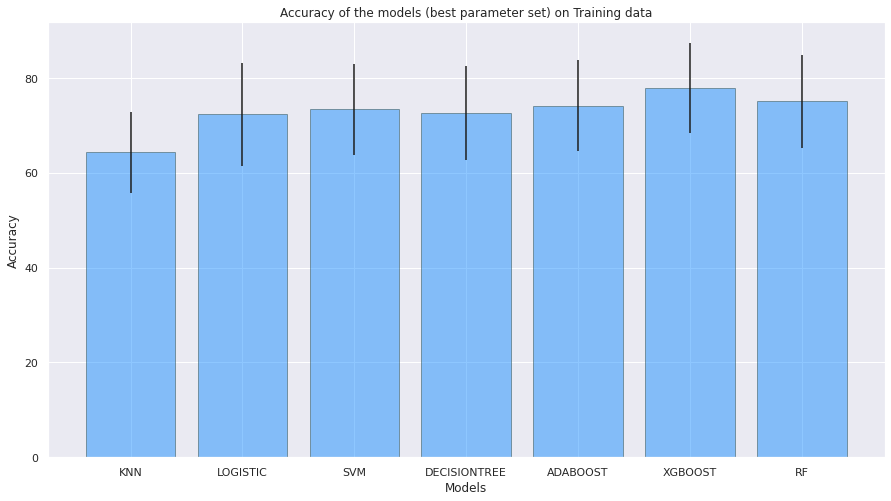

In [ ]:
x_old = [i.upper() for i in models]
x = []
for i in x_old:
    if len(i.split("_")) == 2:
        x.append(i.split("_")[0]+"_SCALED")
    else:
        x.append(i)
        
y = [i*100 for i in mean_score]
yerr = [i*100 for i in std_score]

plt.figure(figsize=[15,8])
plt.bar(x, y, yerr=yerr, color="dodgerblue", alpha=0.5, edgecolor="darkslategray")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of the models (best parameter set) on Training data")
plt.show()

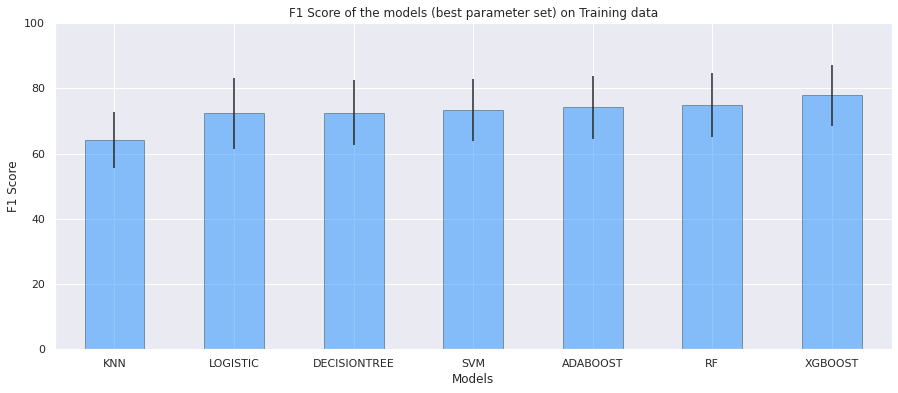

In [ ]:
df = pd.DataFrame({'Models':x, 'Mean Accuracy':y, 'Std Accuracy':yerr})
df.sort_values(by=["Mean Accuracy"], inplace=True)
df.plot.bar(x="Models", y="Mean Accuracy", yerr="Std Accuracy", color="dodgerblue", alpha=0.5, 
            edgecolor="darkslategray", title="F1 Score of the models (best parameter set) on Training data", legend=False, figsize=[15,6], rot=0, grid=True, ylim=[0,100])
plt.ylabel("F1 Score")
plt.show()

In [ ]:
df

,Models,Mean Accuracy,Std Accuracy
0,KNN,64.278254,8.544799
1,LOGISTIC,72.308624,10.845970
3,DECISIONTREE,72.542197,9.901900
2,SVM,73.336369,9.524476
4,ADABOOST,74.148438,9.571647
6,RF,74.999881,9.792376
5,XGBOOST,77.876179,9.421027


## *Modelling using the overersampled data*

In [ ]:
X = credit_data_clean_norm.loc[:, credit_data_clean_norm.columns != "default"]
y = credit_data_clean_norm.loc[:, "default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)
# Since a large imbalance in the distribution of the target variable ("y") we split the data in stratified fashion ("stratify = y") to make sure to approximately preserve relative class frequencies in test and train subsets

As we could find from the initial data analysis, about 90% of data is non-default, while only about 10 is default. This would potentially mislead the predictive models. To avoid this problem we need to make sure that default and non-default creditors take roughly the same weights, which could ensure the potency of our predictive models. This can be achieved in two ways:

1.   **Undersampling of the dataset**. Employ NearMiss algorithm to bring down the amount of the non-default data
2.   **Oversampling of the dataset**. Employ Synthetic Minority Oversampling Technique (SMOTE) to generate synthetic data for defaulted data.



In [ ]:
ns = SMOTE(random_state = 5)

X_train, y_train = ns.fit_resample(X_train, y_train)
print(pd.DataFrame(y_train).value_counts())
X_test, y_test = ns.fit_resample(X_test, y_test)
print(pd.DataFrame(y_test).value_counts())

default
0.0        3065
1.0        3065
dtype: int64
default
0.0        766
1.0        766
dtype: int64


### KNN

In [ ]:
# GridSearch for KNN
params_knn = {'n_neighbors':[3, 5, 7, 10, 12, 15]}
model_knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator = model_knn, param_grid = params_knn, scoring="f1", n_jobs = -1)
grid_knn.fit(X_train, y_train)
df_knn = pd.DataFrame(grid_knn.cv_results_)
df_knn.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/knn_param_tuning.csv")
df_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010752,0.004000,0.063095,0.003254,3,{'n_neighbors': 3},0.845133,0.864662,0.858407,0.854383,0.846834,0.853884,0.007255,1
1,0.008057,0.000747,0.063597,0.006680,5,{'n_neighbors': 5},0.837956,0.854827,0.846991,0.831640,0.836312,0.841545,0.008300,2
2,0.008511,0.000937,0.070668,0.007997,7,{'n_neighbors': 7},0.824460,0.840580,0.834055,0.823362,0.823279,0.829147,0.006995,3
3,0.007901,0.000384,0.070774,0.006160,10,{'n_neighbors': 10},0.802360,0.841328,0.818182,0.814493,0.819957,0.819264,0.012625,4
4,0.008306,0.000353,0.066369,0.004739,12,{'n_neighbors': 12},0.793792,0.827279,0.806145,0.808052,0.813438,0.809741,0.010876,5
5,0.007981,0.000502,0.068773,0.011607,15,{'n_neighbors': 15},0.789964,0.807445,0.798289,0.807263,0.803347,0.801262,0.006558,6


In [ ]:
best_hyperparams = grid_knn.best_params_
print("Best hyperparameters: \n", best_hyperparams )
knn_aftertune_cv_scores = grid_knn.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:\n",  knn_aftertune_cv_scores)
best_knn_model = grid_knn.best_estimator_

Best hyperparameters: 
 {'n_neighbors': 3}
The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:
 0.8538836828069195


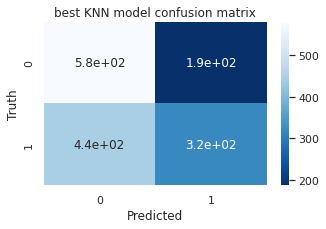

In [ ]:
matrix_knn = confusion_matrix(y_test, best_knn_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_knn, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best KNN model confusion matrix")
plt.show()

### LogisticRegression
Logistic Regression aims to classify an observation based on its modelled posterior probability of the observation belonging to a specific class.

In [ ]:
# GridSearch for LogisticRegression
params_lr = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False], 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}  # GridSearch params
model_lr = LogisticRegression(random_state=42)

grid_lr = GridSearchCV(estimator = model_lr, param_grid = params_lr, scoring="f1", n_jobs = -1)
grid_lr.fit(X_train, y_train)
df_lr = pd.DataFrame(grid_lr.cv_results_)
df_lr.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/logistic_param_tuning.csv")
df_lr

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
840 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_dual,param_fit_intercept,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001097,0.000159,0.000000,0.000000,0.001,True,True,l1,newton-cg,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,173
1,0.000939,0.000054,0.000000,0.000000,0.001,True,True,l1,lbfgs,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,202
2,0.004634,0.000236,0.000000,0.000000,0.001,True,True,l1,liblinear,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,203
3,0.000862,0.000027,0.000000,0.000000,0.001,True,True,l1,sag,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,204
4,0.000868,0.000064,0.000000,0.000000,0.001,True,True,l1,saga,"{'C': 0.001, 'dual': True, 'fit_intercept': Tr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.026233,0.001731,0.003934,0.000052,1000,False,False,l2,newton-cg,"{'C': 1000, 'dual': False, 'fit_intercept': Fa...",0.647059,0.651864,0.637821,0.649231,0.644013,0.645997,0.004833,36
276,0.031878,0.002685,0.004972,0.002103,1000,False,False,l2,lbfgs,"{'C': 1000, 'dual': False, 'fit_intercept': Fa...",0.647059,0.651864,0.637821,0.649231,0.644013,0.645997,0.004833,36
277,0.014302,0.002781,0.003716,0.000305,1000,False,False,l2,liblinear,"{'C': 1000, 'dual': False, 'fit_intercept': Fa...",0.647059,0.651347,0.637821,0.649231,0.644013,0.645894,0.004711,42
278,0.027284,0.001092,0.003730,0.000198,1000,False,False,l2,sag,"{'C': 1000, 'dual': False, 'fit_intercept': Fa...",0.647059,0.651864,0.637821,0.649231,0.644013,0.645997,0.004833,36


In [ ]:
best_hyperparams = grid_lr.best_params_
print("Best hyperparameters: \n", best_hyperparams )
lr_aftertune_cv_scores = grid_lr.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:\n",  lr_aftertune_cv_scores)
best_lr_model = grid_lr.best_estimator_

Best hyperparameters: 
 {'C': 1000, 'dual': True, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:
 0.7062095171112476


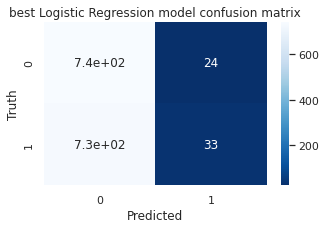

In [ ]:
matrix_lr = confusion_matrix(y_test, best_lr_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_lr, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best Logistic Regression model confusion matrix")
plt.show()

### Support Vector Machines
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points and has the maximum margin.

In [ ]:
# GridSearch for SVM
params_svm = {'C': [0.1, 1, 10, 50, 100, 200, 500, 1000], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}  # GridSearch params
model_svm = SVC(random_state=42)

grid_svm = GridSearchCV(estimator = model_svm, param_grid = params_svm, refit = True, verbose = 4, scoring="f1", n_jobs = -1)
grid_svm.fit(X_train, y_train)
df_svm = pd.DataFrame(grid_svm.cv_results_)
df_svm.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/svm_param_tuning.csv")
df_svm

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.774421,0.074979,0.454809,0.001132,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.683507,0.686869,0.689189,0.699140,0.679699,0.687681,0.006563,15
1,1.780782,0.036701,0.493346,0.004753,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.616791,0.625407,0.612040,0.626914,0.596315,0.615493,0.011047,16
2,1.581042,0.020106,0.407117,0.002097,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.696746,0.687546,0.699851,0.704789,0.703021,0.698391,0.006080,13
3,1.732261,0.034276,0.454312,0.006553,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.683507,0.680057,0.697947,0.703125,0.676119,0.688151,0.010507,14
4,1.748444,0.022774,0.394014,0.005906,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.705279,0.707965,0.717281,0.713776,0.712288,0.711318,0.004249,6
5,1.693311,0.010744,0.419498,0.003667,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.693295,0.693182,0.706629,0.716929,0.707670,0.703541,0.009145,11
6,2.136858,0.055978,0.385876,0.004446,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.715018,0.719350,0.734635,0.724113,0.719824,0.722588,0.006676,5
7,1.753052,0.037006,0.413290,0.005606,50,auto,rbf,"{'C': 50, 'gamma': 'auto', 'kernel': 'rbf'}",0.692252,0.695464,0.703887,0.712803,0.709724,0.702826,0.007928,12
8,2.547684,0.119716,0.384412,0.009824,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.727273,0.729670,0.732312,0.732659,0.726608,0.729704,0.002491,4
9,1.865836,0.055002,0.418188,0.006129,100,auto,rbf,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.698344,0.698847,0.705799,0.716459,0.711692,0.706228,0.007090,10


In [ ]:
best_hyperparams = grid_svm.best_params_
print("Best hyperparameters: \n", best_hyperparams )
svm_aftertune_cv_scores = grid_svm.best_score_
print("The cross-validation accuracy score for tuned SVM model after a 10 fold cross validation:\n",  svm_aftertune_cv_scores)
best_svm_model = grid_svm.best_estimator_

Best hyperparameters: 
 {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
The cross-validation accuracy score for tuned SVM model after a 10 fold cross validation:
 0.7525574143312996


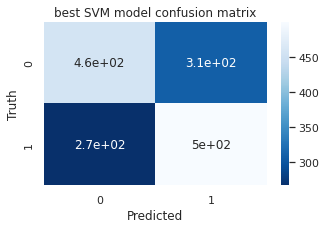

In [ ]:
matrix_svm = confusion_matrix(y_test, best_svm_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_svm, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best SVM model confusion matrix")
plt.show()

### Decision Trees
A decision tree algorithm binary splits the feature space into subsets in order to divide the samples into more homogeneous groups.

In [ ]:
# GridSearch for DecisionTreeClassifier

params_dt = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 10, 7, 5], 'min_samples_split':[2, 3, 4]}  # Grid search params
model_dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(estimator = model_dt, param_grid = params_dt, scoring = "f1", n_jobs = -1)
grid_dt.fit(X_train, y_train)
df_dt = pd.DataFrame(grid_dt.cv_results_)
df_dt.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/decisiontree_param_tuning.csv")
df_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033080,0.002593,0.003565,0.000183,gini,None,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.787983,0.859212,0.858730,0.875901,0.860031,0.848371,0.030872,2
1,0.010754,0.003688,0.003993,0.001286,gini,None,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.814450,0.833333,0.843106,0.849805,0.854460,0.839031,0.014195,8
2,0.035443,0.003079,0.003642,0.000386,gini,None,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.787456,0.858748,0.856685,0.877850,0.861394,0.848427,0.031388,1
3,0.009077,0.000383,0.003421,0.000088,gini,None,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.811083,0.828947,0.853204,0.853204,0.843106,0.837909,0.016092,9
4,0.030864,0.002516,0.003665,0.000216,gini,None,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.783434,0.852273,0.847703,0.874388,0.860063,0.843572,0.031404,5
5,0.009905,0.002694,0.003391,0.000111,gini,None,4,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.790580,0.840722,0.846466,0.830744,0.843393,0.830381,0.020587,12
6,0.024757,0.002560,0.003321,0.000194,gini,10,2,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.754510,0.818584,0.808696,0.803053,0.795632,0.796095,0.022102,14
7,0.006161,0.000413,0.003336,0.000072,gini,10,2,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.724872,0.784496,0.721718,0.721139,0.762855,0.743016,0.025983,29
8,0.025685,0.002499,0.003396,0.000286,gini,10,3,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.746855,0.818851,0.808388,0.803053,0.796571,0.794744,0.025032,15
9,0.006286,0.000652,0.003766,0.000905,gini,10,3,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.724872,0.746479,0.772977,0.717293,0.762115,0.744747,0.021215,28


In [ ]:
best_hyperparams = grid_dt.best_params_
print("Best hyperparameters: \n", best_hyperparams )
dt_aftertune_cv_scores = grid_dt.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:\n",  dt_aftertune_cv_scores)
best_dt_model = grid_dt.best_estimator_

Best hyperparameters: 
 {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 3, 'splitter': 'best'}
The cross-validation accuracy score for tuned decisionTree model after a 5 fold cross validation:
 0.8484267685303559


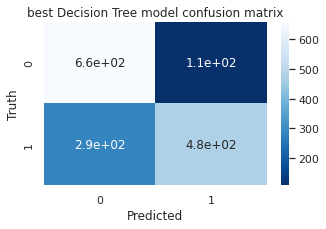

In [ ]:
matrix_dt = confusion_matrix(y_test, best_dt_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_dt, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best Decision Tree model confusion matrix")
plt.show()

             features  importance
     prev_contr_count    0.253063
       company_rating    0.207073
       person_scoring    0.202422
incorp_to_applic_days    0.177301
         net_turnover    0.097267
         max_late_1yr    0.062874


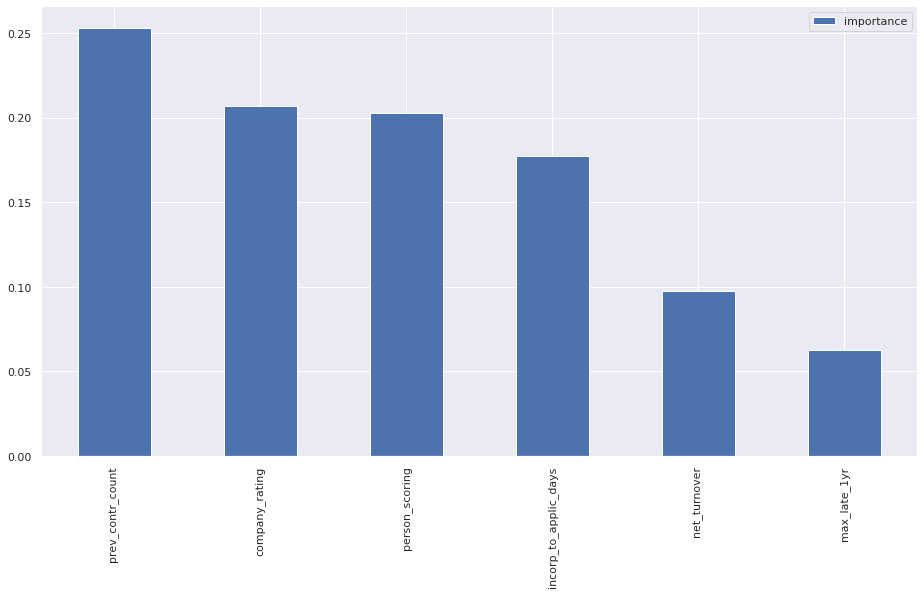

In [ ]:
# Top 3 features for Decision Tree
# Enter your code here

important_features_dt = best_dt_model.feature_importances_
features_name_dt = X.columns
imp_feature_frame_dt = pd.DataFrame({'features': features_name_dt, 'importance': important_features_dt}, index=X.columns).sort_values(by = "importance", ascending = False)
print(imp_feature_frame_dt.to_string(index=False))
imp_feature_frame_dt.plot(kind='bar')
# print(list(imp_feature_frame_dt.features))

### AdaBoost
AdaBoost is an ensemble learning method (also known as “meta-learning”) which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.

In [ ]:
# GridSearch for AdaBoost
base_dt = best_dt_model
params_ada = {'algorithm':['SAMME', 'SAMME.R'],
              'n_estimators':[100,300,500,600],
              'learning_rate':[0.01,0.08, 0.1, 0.5, 1.0]
              }  ## GridSearch params
model_ada = AdaBoostClassifier(base_estimator = base_dt, n_estimators = 200, learning_rate = .05, random_state = 42)

grid_ada = GridSearchCV(estimator = model_ada, param_grid = params_ada, scoring = "f1", n_jobs = -1)
grid_ada.fit(X_train, y_train)
df_ada = pd.DataFrame(grid_ada.cv_results_)
df_ada.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/adaboost_param_tuning.csv")
df_ada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.873207,0.360363,0.038329,0.003732,SAMME,0.01,100,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.790378,0.861711,0.863962,0.886056,0.870313,0.854484,0.033163,32
1,4.452717,1.605133,0.055156,0.016986,SAMME,0.01,300,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.784854,0.864217,0.857369,0.897106,0.870313,0.854772,0.037465,29
2,4.439446,1.610857,0.055633,0.018322,SAMME,0.01,500,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.784854,0.864217,0.857369,0.897106,0.870313,0.854772,0.037465,29
3,4.416133,1.577277,0.055871,0.018479,SAMME,0.01,600,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.784854,0.864217,0.857369,0.897106,0.870313,0.854772,0.037465,29
4,0.851590,0.226625,0.013205,0.002457,SAMME,0.08,100,"{'algorithm': 'SAMME', 'learning_rate': 0.08, ...",0.777103,0.861931,0.867355,0.886237,0.860917,0.850709,0.037914,33
5,0.855804,0.221234,0.013628,0.002412,SAMME,0.08,300,"{'algorithm': 'SAMME', 'learning_rate': 0.08, ...",0.777103,0.861931,0.867355,0.886237,0.860917,0.850709,0.037914,33
6,0.874043,0.213846,0.014245,0.002717,SAMME,0.08,500,"{'algorithm': 'SAMME', 'learning_rate': 0.08, ...",0.777103,0.861931,0.867355,0.886237,0.860917,0.850709,0.037914,33
7,0.856973,0.227608,0.014310,0.003798,SAMME,0.08,600,"{'algorithm': 'SAMME', 'learning_rate': 0.08, ...",0.777103,0.861931,0.867355,0.886237,0.860917,0.850709,0.037914,33
8,0.626669,0.270976,0.010605,0.002883,SAMME,0.1,100,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.789700,0.880645,0.868878,0.870759,0.864025,0.854801,0.032997,25
9,0.619920,0.268923,0.011274,0.002878,SAMME,0.1,300,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.789700,0.880645,0.868878,0.870759,0.864025,0.854801,0.032997,25


In [ ]:
best_hyperparams = grid_ada.best_params_
print("Best hyperparameters: \n", best_hyperparams )
ada_aftertune_cv_scores = grid_ada.best_score_
print("The cross-validation accuracy score for tuned AdaBoost model after a 5 fold cross validation:\n",  ada_aftertune_cv_scores)
best_ada_model = grid_ada.best_estimator_

Best hyperparameters: 
 {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}
The cross-validation accuracy score for tuned AdaBoost model after a 5 fold cross validation:
 0.9153075873394638


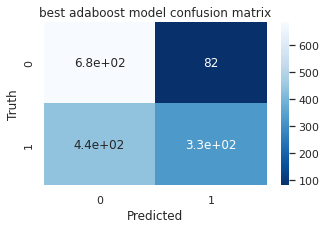

In [ ]:
matrix = confusion_matrix(y_test, best_ada_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best adaboost model confusion matrix")
plt.show()

             features  importance
       company_rating         NaN
         net_turnover         NaN
       person_scoring         NaN
     prev_contr_count         NaN
         max_late_1yr         NaN
incorp_to_applic_days         NaN


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


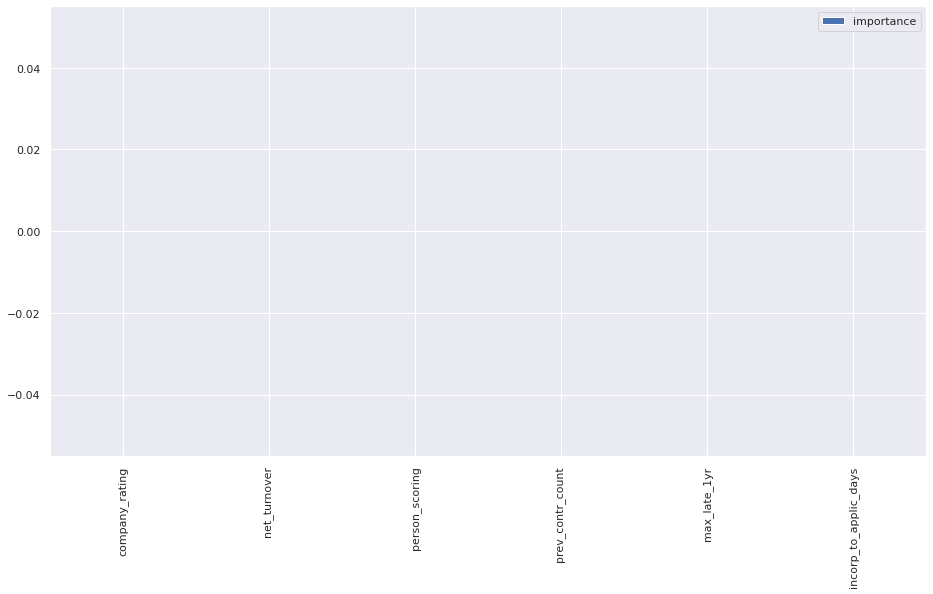

In [ ]:
# Top 3 features for AdaBoost
# Enter your code here

important_features_ada = best_ada_model.feature_importances_
features_name_ada = X.columns
imp_feature_frame_ada = pd.DataFrame({'features': features_name_ada, 'importance': important_features_ada}, index=X.columns).sort_values(by = "importance", ascending = False)
print(imp_feature_frame_ada.to_string(index=False))
imp_feature_frame_ada.plot(kind='bar')
# print(list(imp_feature_frame_ada.features))

### XGBoost
XGBoost is an abbreviation of eXtreme Gradient Boosting. One of the advantages of XGBoost is its scalability and faster model exploration due to the parallel and distributed computing 

In [ ]:
# GridSearch for XGBoost
params_xgb = {'gamma': [0,0.1,10,50,200],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [5,8,12],
              'n_estimators': [50,100,150],
              'reg_alpha': [0,0.1,10,50,200],
              'reg_lambda': [0,0.1,10,50,200]}  ## GridSearch params
model_xgb = XGBClassifier(random_state = 42)

grid_xgb = GridSearchCV(estimator = model_xgb, param_grid = params_xgb, scoring = "f1", n_jobs = -1)
grid_xgb.fit(X_train, y_train)
df_xgb = pd.DataFrame(grid_xgb.cv_results_)
df_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/xgboost_param_tuning.csv")
df_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.678562,0.432617,0.007226,0.000553,0,0.01,5,50,0,0,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.699482,0.810728,0.774046,0.772932,0.781417,0.767721,0.036772,946
1,0.322872,0.008284,0.006885,0.000163,0,0.01,5,50,0,0.1,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.696104,0.805513,0.774046,0.773854,0.781417,0.766187,0.036907,970
2,0.329677,0.010393,0.006602,0.000158,0,0.01,5,50,0,10,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.729508,0.801544,0.774292,0.763278,0.774924,0.768709,0.023299,941
3,0.323313,0.010765,0.006590,0.000575,0,0.01,5,50,0,50,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.721633,0.779141,0.746708,0.749422,0.734759,0.746332,0.019132,1372
4,0.318614,0.007568,0.006642,0.000185,0,0.01,5,50,0,200,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.711111,0.768992,0.730949,0.752374,0.730032,0.738692,0.020005,1551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,1.222629,0.037327,0.005028,0.000123,200,0.5,12,150,200,0,"{'gamma': 200, 'learning_rate': 0.5, 'max_dept...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3241
3371,1.237692,0.040996,0.005100,0.000098,200,0.5,12,150,200,0.1,"{'gamma': 200, 'learning_rate': 0.5, 'max_dept...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3241
3372,1.230709,0.037388,0.005096,0.000118,200,0.5,12,150,200,10,"{'gamma': 200, 'learning_rate': 0.5, 'max_dept...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3241
3373,1.204070,0.044028,0.005003,0.000077,200,0.5,12,150,200,50,"{'gamma': 200, 'learning_rate': 0.5, 'max_dept...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3241


In [ ]:
best_hyperparams = grid_xgb.best_params_
print("Best hyperparameters: \n", best_hyperparams )
xgb_aftertune_cv_scores = grid_xgb.best_score_
print("The cross-validation accuracy score for tuned XGBoost model after a 5 fold cross validation:\n",  xgb_aftertune_cv_scores)
best_xgb_model = grid_xgb.best_estimator_

Best hyperparameters: 
 {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 150, 'reg_alpha': 0, 'reg_lambda': 0.1}
The cross-validation accuracy score for tuned XGBoost model after a 5 fold cross validation:
 0.9128464250683394


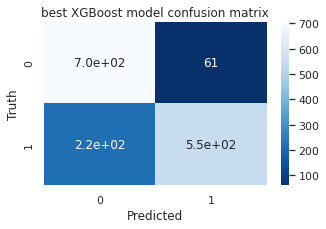

In [ ]:
matrix = confusion_matrix(y_test, best_xgb_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best XGBoost model confusion matrix")
plt.show()

             features  importance
     prev_contr_count    0.543484
         max_late_1yr    0.138646
       company_rating    0.094152
       person_scoring    0.088104
         net_turnover    0.069486
incorp_to_applic_days    0.066128


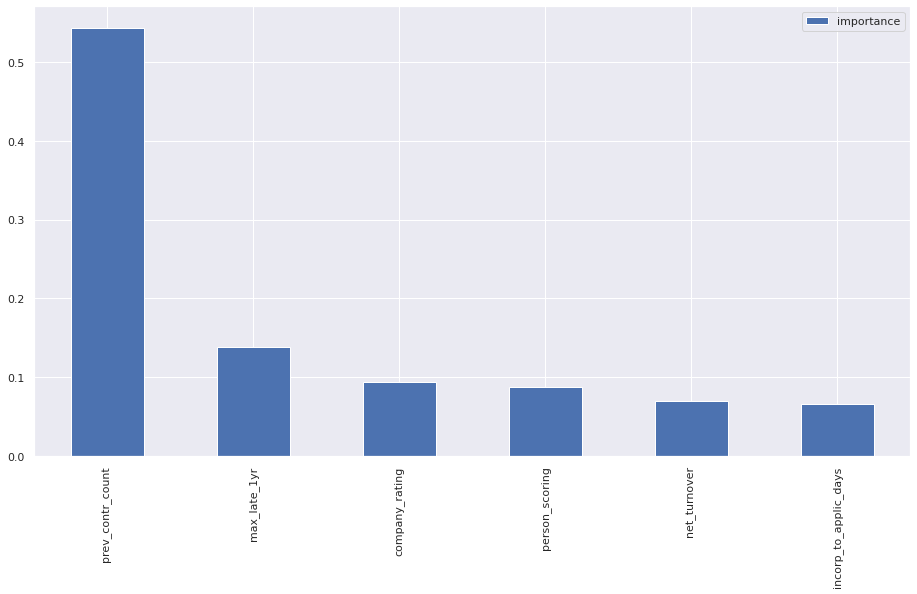

In [ ]:
# Top 3 features for XGBoost
# Enter your code here

important_features_xgb = best_xgb_model.feature_importances_
features_name_xgb = X.columns
imp_feature_frame_xgb = pd.DataFrame({'features': features_name_xgb, 'importance': important_features_xgb}, index=X.columns).sort_values(by = "importance", ascending = False)
print(imp_feature_frame_xgb.to_string(index=False))
imp_feature_frame_xgb.plot(kind='bar')
# print(list(imp_feature_frame_xgb.features))

### Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
# GridSearch for Random Forest
params_rf = {'n_estimators': [100,300,400,500, 600,1000],
             'max_depth':[None, 5, 7, 10, 100, 200],
             'criterion': ["gini", "entropy"],
             'max_features': ["log2", "sqrt"],
             'bootstrap':[True, False],
             'min_samples_split':[2, 3, 4]
             }  # GridSearch params
model_rf = RandomForestClassifier(random_state = 42)

grid_rf = GridSearchCV(estimator = model_rf, param_grid = params_rf, scoring="f1", n_jobs = -1)
grid_rf.fit(X_train, y_train)
df_rf = pd.DataFrame(grid_rf.cv_results_)
df_rf.to_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/rf_param_tuning.csv")
df_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.086463,0.007647,0.060074,0.004592,True,gini,None,log2,2,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.829825,0.910843,0.919778,0.914331,0.905983,0.896152,0.033468,403
1,3.252727,0.047984,0.158567,0.009472,True,gini,None,log2,2,300,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.837004,0.916399,0.921615,0.918530,0.906274,0.899965,0.031898,307
2,4.307797,0.042323,0.205406,0.006998,True,gini,None,log2,2,400,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.841367,0.918006,0.920886,0.920990,0.909232,0.902096,0.030666,235
3,5.533274,0.277460,0.258387,0.006825,True,gini,None,log2,2,500,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.841367,0.916399,0.918577,0.920255,0.909232,0.901166,0.030135,253
4,6.398358,0.013122,0.306844,0.004175,True,gini,None,log2,2,600,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.840630,0.917136,0.920886,0.921474,0.904872,0.901000,0.030772,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,7.190146,0.097631,0.164694,0.007424,False,entropy,200,sqrt,4,300,"{'bootstrap': False, 'criterion': 'entropy', '...",0.840989,0.919614,0.928063,0.924194,0.917127,0.905997,0.032721,157
860,9.551228,0.159132,0.216700,0.012579,False,entropy,200,sqrt,4,400,"{'bootstrap': False, 'criterion': 'entropy', '...",0.846767,0.920354,0.926482,0.926045,0.917981,0.907526,0.030554,61
861,11.944685,0.133695,0.258120,0.005373,False,entropy,200,sqrt,4,500,"{'bootstrap': False, 'criterion': 'entropy', '...",0.846767,0.920226,0.928063,0.926045,0.917258,0.907672,0.030699,49
862,14.388487,0.065751,0.315483,0.013505,False,entropy,200,sqrt,4,600,"{'bootstrap': False, 'criterion': 'entropy', '...",0.844996,0.921837,0.927330,0.926045,0.918706,0.907783,0.031543,43


In [ ]:
best_hyperparams = grid_rf.best_params_
print("Best hyperparameters: \n", best_hyperparams )
rf_aftertune_cv_scores = grid_rf.best_score_
print("The cross-validation accuracy score for tuned Random Forest model after a 10 fold cross validation:\n",  rf_aftertune_cv_scores)
best_rf_model = grid_rf.best_estimator_

Best hyperparameters: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 600}
The cross-validation accuracy score for tuned Random Forest model after a 10 fold cross validation:
 0.909154960427274


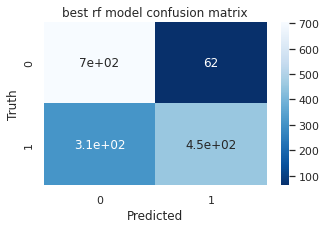

In [ ]:
matrix_rf = confusion_matrix(y_test, best_rf_model.predict(X_test))
plt.figure(figsize = (5,3))
sns.heatmap(matrix_rf, annot=True, cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best rf model confusion matrix")
plt.show()

             features  importance
       company_rating    0.218237
       person_scoring    0.217998
incorp_to_applic_days    0.199973
     prev_contr_count    0.181236
         net_turnover    0.116666
         max_late_1yr    0.065889


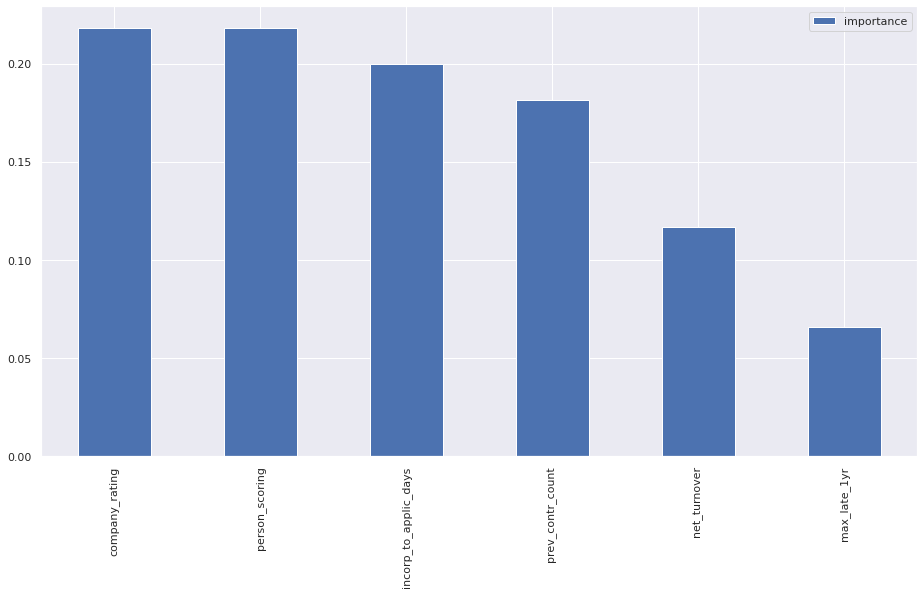

In [ ]:
# Top 3 features for RandomForest
# Enter your code here

important_features_rf = best_rf_model.feature_importances_
features_name_rf = X.columns
imp_feature_frame_rf = pd.DataFrame({'features': features_name_rf, 'importance': important_features_rf}, index=X.columns).sort_values(by = "importance", ascending =False)
print(imp_feature_frame_rf.to_string(index=False))
imp_feature_frame_rf.plot(kind='bar')
# print(list(imp_feature_frame_rf.features))

### Consolidating the best set of parameters

In [ ]:
import os

files = os.listdir("/content/drive/MyDrive/Colab Notebooks/parameter_search/")
for file in files:
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/"+file, index_col=0).sort_values(by=["rank_test_score"])
    print(file.split(".")[0], *df[df["rank_test_score"]==1]["params"], "\n")

rf_param_tuning {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 200, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 600} {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 600} {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 600} {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 200, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 600} {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 600} {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 600} 

knn_param_tuning {'n_neighbors': 3} 

logistic_param_tuning {'C': 1000, 'dual': True, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'} 

svm_param_tuning {'C': 1000, 'gamma':

In [ ]:
models = []
mean_score = []
std_score = []

for file in files:
    print(file)
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/parameter_search/"+file, index_col=0)
    display(df[df["rank_test_score"]==1][["mean_test_score", "std_test_score"]])
    models.append(file.split("_param_tuning.csv")[0])
    mean_score.append(df[df["rank_test_score"]==1]["mean_test_score"].unique()[0])
    std_score.append(df[df["rank_test_score"]==1]["std_test_score"].unique()[0])

rf_param_tuning.csv


,mean_test_score,std_test_score
652,0.909155,0.029639
670,0.909155,0.029639
796,0.909155,0.029639
814,0.909155,0.029639
832,0.909155,0.029639
850,0.909155,0.029639


knn_param_tuning.csv


,mean_test_score,std_test_score
0,0.853884,0.007255


logistic_param_tuning.csv


,mean_test_score,std_test_score
247,0.70621,0.004482


svm_param_tuning.csv


,mean_test_score,std_test_score
14,0.752557,0.004315


decisiontree_param_tuning.csv


,mean_test_score,std_test_score
2,0.848427,0.031388


adaboost_param_tuning.csv


,mean_test_score,std_test_score
38,0.915308,0.013684


xgboost_param_tuning.csv


,mean_test_score,std_test_score
426,0.912846,0.055988


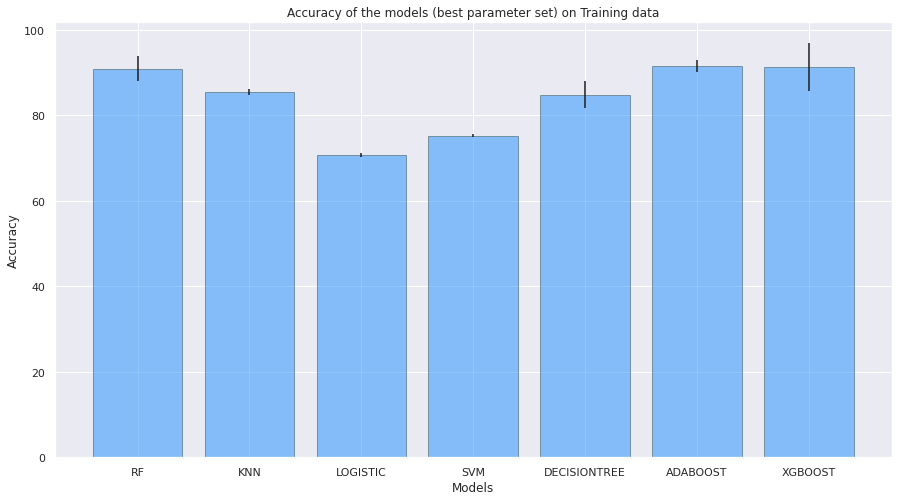

In [ ]:
x_old = [i.upper() for i in models]
x = []
for i in x_old:
    if len(i.split("_")) == 2:
        x.append(i.split("_")[0]+"_SCALED")
    else:
        x.append(i)
        
y = [i*100 for i in mean_score]
yerr = [i*100 for i in std_score]

plt.figure(figsize=[15,8])
plt.bar(x, y, yerr=yerr, color="dodgerblue", alpha=0.5, edgecolor="darkslategray")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of the models (best parameter set) on Training data")
plt.show()

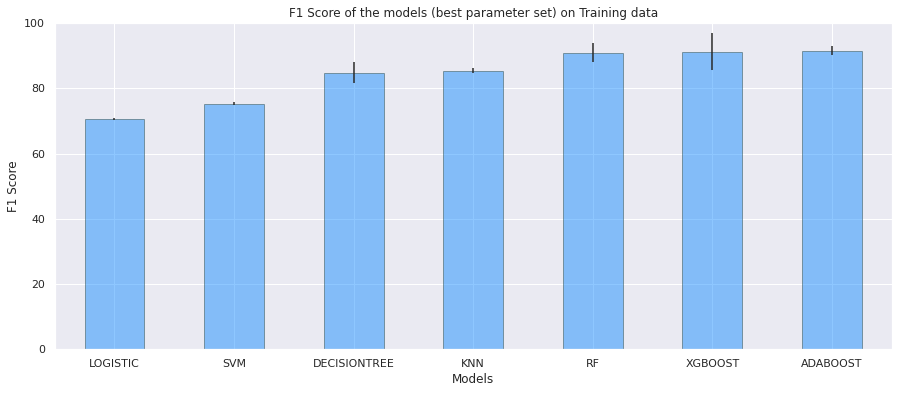

In [ ]:
df = pd.DataFrame({'Models':x, 'Mean Accuracy':y, 'Std Accuracy':yerr})
df.sort_values(by=["Mean Accuracy"], inplace=True)
df.plot.bar(x="Models", y="Mean Accuracy", yerr="Std Accuracy", color="dodgerblue", alpha=0.5, 
            edgecolor="darkslategray", title="F1 Score of the models (best parameter set) on Training data", legend=False, figsize=[15,6], rot=0, grid=True, ylim=[0,100])
plt.ylabel("F1 Score")
plt.show()

In [ ]:
df

,Models,Mean Accuracy,Std Accuracy
2,LOGISTIC,70.620952,0.448184
3,SVM,75.255741,0.431548
4,DECISIONTREE,84.842677,3.138788
1,KNN,85.388368,0.725477
0,RF,90.915496,2.963924
6,XGBOOST,91.284643,5.598823
5,ADABOOST,91.530759,1.368363


# 6. Next steps to improve predictions

* Use larger dataset
* Try to further optimize parameters of the most successful model by extending the grid search around the best parameters
* Understand the reason for high level of false negative results and find a way to reduce it
* Evaluate model performance with the different data scaler
* Try to use Artificial Neural Network to evaluate its performance for the case